## EDA theo hướng phân tán (Dispersion)

các mục cần làm là tính:
1. Range - khoảng biến thiên
2. Quartile - tứ phân vị
3. Interquartile Range (IQR) - độ trải giữa (khoảng tứ phân vị)
4. Variance - phương sai
5. Standard deviation (std) - độ lệch chuẩn
6. Coefficient of Variation (CV) - hệ số biến thiên


### Thêm các thư viện cần thiết

In [97]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
import seaborn as sns

### Đọc data

In [98]:
data = pd.read_csv('../data/interim/handled_missing_values.csv')
data

,Gender,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Physical_Activity,...,Mental_Health,Sleep,Stress,Pollution,Sun_Exposure,Education,Income,Age,Systolic_BP,Diastolic_BP
0,Male,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,...,Good,Insomnia,2.797064,5.142344,7.108975,Undergraduate,Medium,89,151,109
1,Male,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,...,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77,134,112
2,Female,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,...,Poor,Insomnia,9.234637,8.500386,5.393408,Undergraduate,Medium,70,160,101
3,Female,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,...,Poor,Insomnia,4.693446,7.555511,2.745578,Undergraduate,Low,52,133,94
4,Female,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,...,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79,170,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,161.632502,88.323405,204.175510,33.807917,112.075747,1.583006,0.665907,27.997736,Moderate,...,Fair,Normal,8.091897,9.846088,9.111205,Undergraduate,High,22,134,91
2996,Male,163.443512,93.217007,197.384424,34.894725,101.177692,1.785129,0.720304,32.866623,Low,...,Good,Normal,2.427081,1.141303,8.578184,Undergraduate,Medium,19,110,78
2997,Male,177.857644,86.258847,238.641542,27.268332,110.548146,0.366012,0.200000,39.756270,Moderate,...,Fair,Normal,7.671837,5.101134,2.199199,Undergraduate,Low,85,159,116
2998,Female,162.287164,41.371018,198.244328,15.708252,123.704379,1.452963,0.648158,43.338594,Moderate,...,Good,Insomnia,7.920076,4.452130,5.051613,Undergraduate,High,30,134,82


### Kiểm tra các kiểu của dữ liệu

In [99]:
data.dtypes

Gender                 object
Height                float64
Weight                float64
Cholesterol           float64
BMI                   float64
Blood_Glucose         float64
Bone_Density          float64
Vision                float64
Hearing               float64
Physical_Activity      object
Smoking                object
Alcohol                object
Diet                   object
Chronic_Diseases       object
Medication             object
Family_History         object
Cognitive_Function    float64
Mental_Health          object
Sleep                  object
Stress                float64
Pollution             float64
Sun_Exposure          float64
Education              object
Income                 object
Age                     int64
Systolic_BP             int64
Diastolic_BP            int64
dtype: object

### Xem tóm tắt của data

In [100]:
data.describe()

,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Cognitive_Function,Stress,Pollution,Sun_Exposure,Age,Systolic_BP,Diastolic_BP
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,168.590835,72.537260,234.029794,25.550146,126.653909,0.931899,0.474591,47.016214,63.868376,5.476507,5.028982,5.955785,53.485667,146.027333,95.567000
std,9.293006,13.190734,24.521436,4.367322,18.226124,0.443550,0.209726,14.336464,11.755738,2.584901,2.871408,3.474595,20.569690,15.968080,9.923256
min,141.130985,32.537672,148.811514,12.049900,69.866884,-0.219787,0.200000,0.000000,30.382098,1.000428,0.006395,0.002055,18.000000,97.000000,60.000000
25%,161.629515,63.222773,216.756601,22.454115,114.392605,0.561063,0.281671,36.734775,55.647794,3.221745,2.607185,2.873285,36.000000,135.000000,89.000000
50%,168.215632,71.448651,234.376822,25.352113,126.802186,0.939585,0.462070,46.963733,64.014652,5.496618,5.095686,5.956789,53.000000,146.000000,95.000000
75%,175.522665,81.702801,250.646674,28.403543,139.377079,1.294570,0.639498,56.828847,72.087453,7.680320,7.476338,8.991349,72.000000,157.000000,103.000000
max,198.112215,123.598603,331.300589,43.329869,185.736144,1.999829,1.062537,94.003824,106.479831,9.996323,9.998090,11.992504,89.000000,193.000000,133.000000


### lấy ra các cột là biến số

In [101]:
numeric_columns = data.select_dtypes(include=['number']).columns
print("Các cột có kiểu số:")
print(numeric_columns)


Các cột có kiểu số:
Index(['Height', 'Weight', 'Cholesterol', 'BMI', 'Blood_Glucose',
       'Bone_Density', 'Vision', 'Hearing', 'Cognitive_Function', 'Stress',
       'Pollution', 'Sun_Exposure', 'Age', 'Systolic_BP', 'Diastolic_BP'],
      dtype='object')


### lấy ra các cột là biến phân loại

In [102]:
categorical_features = data.select_dtypes(include=['object', 'category']).columns
print("Các cột có kiểu category:")
print(categorical_features)

Các cột có kiểu category:
Index(['Gender', 'Physical_Activity', 'Smoking', 'Alcohol', 'Diet',
       'Chronic_Diseases', 'Medication', 'Family_History', 'Mental_Health',
       'Sleep', 'Education', 'Income'],
      dtype='object')


In [103]:
df = pd.DataFrame(data)

### Tính các range của các biến số

In [104]:
for col in numeric_columns:
    col_range = data[col].max() - data[col].min()
    print(f"Range của {col}: {col_range}")

Range của Height: 56.98123043155178
Range của Weight: 91.06093093023375
Range của Cholesterol: 182.48907542498767
Range của BMI: 31.279969670157726
Range của Blood_Glucose: 115.86926006866871
Range của Bone_Density: 2.2196160983475623
Range của Vision: 0.8625374576346181
Range của Hearing: 94.00382427807536
Range của Cognitive_Function: 76.0977325829051
Range của Stress: 8.995894720116976
Range của Pollution: 9.99169512584789
Range của Sun_Exposure: 11.990449193491337
Range của Age: 71
Range của Systolic_BP: 96
Range của Diastolic_BP: 73


### Tính độ lệch chuẩn, phương sai và hệ số biến thiên

In [105]:
print("Độ lệch chuẩn, phương sai và hệ số biến thiên của các cột số:")
for col in numeric_columns:
    std_dev = data[col].std()
    variance = data[col].var()
    mean = data[col].mean()
    cv = (std_dev / mean) * 100
    print(f"{col} - Độ lệch chuẩn: {std_dev:.2f}, phương sai: {variance:.2f}, Hệ số biến thiên: {cv:.2f}%")

Độ lệch chuẩn, phương sai và hệ số biến thiên của các cột số:
Height - Độ lệch chuẩn: 9.29, phương sai: 86.36, Hệ số biến thiên: 5.51%
Weight - Độ lệch chuẩn: 13.19, phương sai: 174.00, Hệ số biến thiên: 18.18%
Cholesterol - Độ lệch chuẩn: 24.52, phương sai: 601.30, Hệ số biến thiên: 10.48%
BMI - Độ lệch chuẩn: 4.37, phương sai: 19.07, Hệ số biến thiên: 17.09%
Blood_Glucose - Độ lệch chuẩn: 18.23, phương sai: 332.19, Hệ số biến thiên: 14.39%
Bone_Density - Độ lệch chuẩn: 0.44, phương sai: 0.20, Hệ số biến thiên: 47.60%
Vision - Độ lệch chuẩn: 0.21, phương sai: 0.04, Hệ số biến thiên: 44.19%
Hearing - Độ lệch chuẩn: 14.34, phương sai: 205.53, Hệ số biến thiên: 30.49%
Cognitive_Function - Độ lệch chuẩn: 11.76, phương sai: 138.20, Hệ số biến thiên: 18.41%
Stress - Độ lệch chuẩn: 2.58, phương sai: 6.68, Hệ số biến thiên: 47.20%
Pollution - Độ lệch chuẩn: 2.87, phương sai: 8.24, Hệ số biến thiên: 57.10%
Sun_Exposure - Độ lệch chuẩn: 3.47, phương sai: 12.07, Hệ số biến thiên: 58.34%
Age - Độ

### Tính khoảng trải giữa

In [106]:
print("Interquartile Range (IQR) của các cột số:")
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"{col} - IQR: {IQR:.2f}")

Interquartile Range (IQR) của các cột số:
Height - IQR: 13.89
Weight - IQR: 18.48
Cholesterol - IQR: 33.89
BMI - IQR: 5.95
Blood_Glucose - IQR: 24.98
Bone_Density - IQR: 0.73
Vision - IQR: 0.36
Hearing - IQR: 20.09
Cognitive_Function - IQR: 16.44
Stress - IQR: 4.46
Pollution - IQR: 4.87
Sun_Exposure - IQR: 6.12
Age - IQR: 36.00
Systolic_BP - IQR: 22.00
Diastolic_BP - IQR: 14.00


### Vẽ box plot

### Các biến phân loại

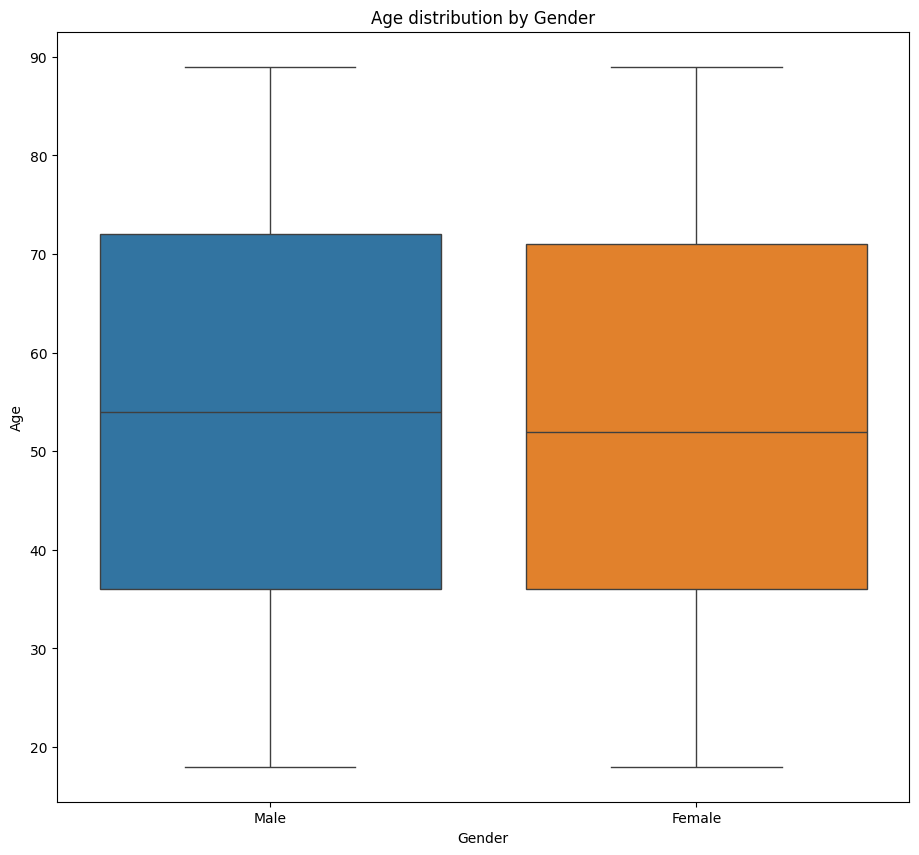

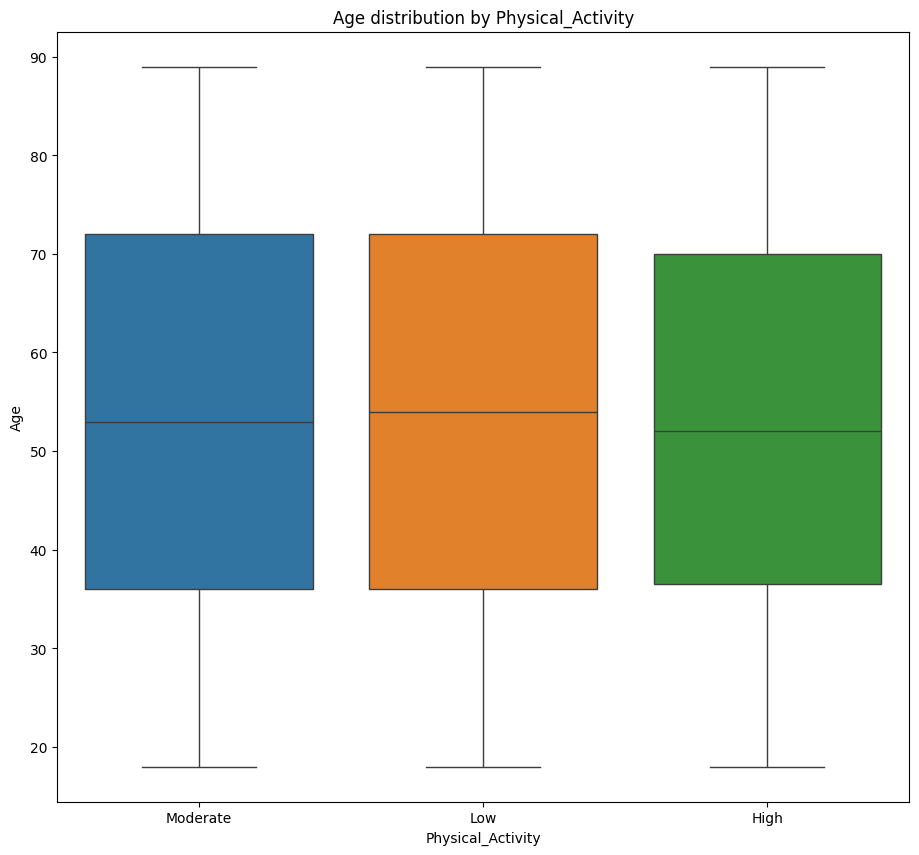

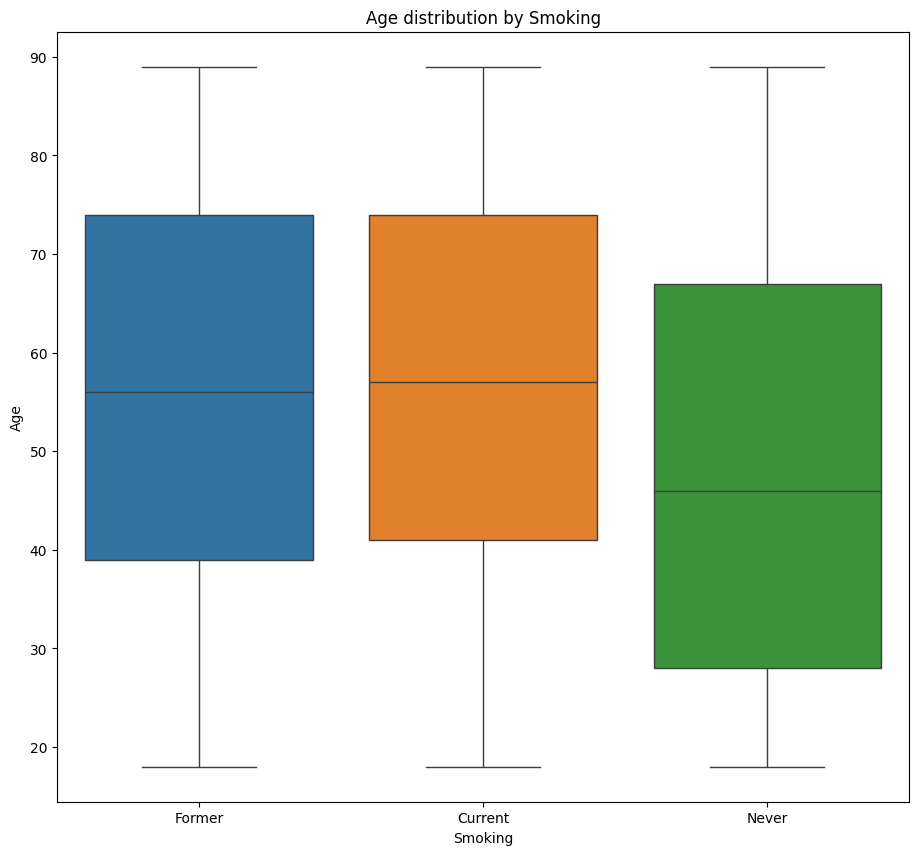

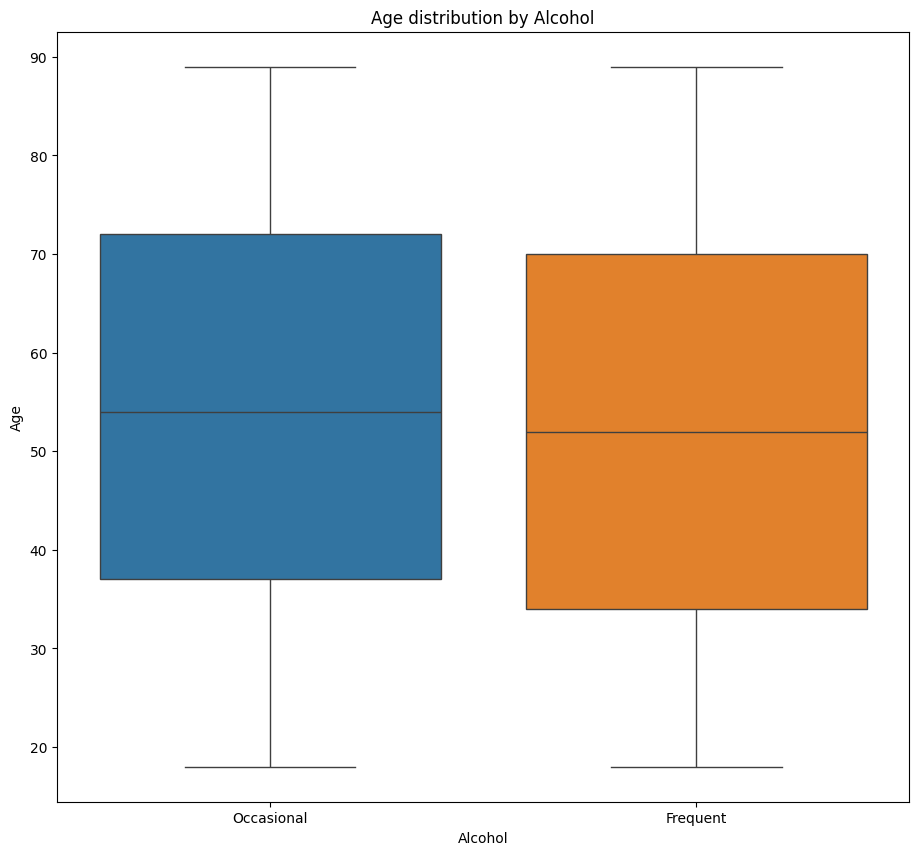

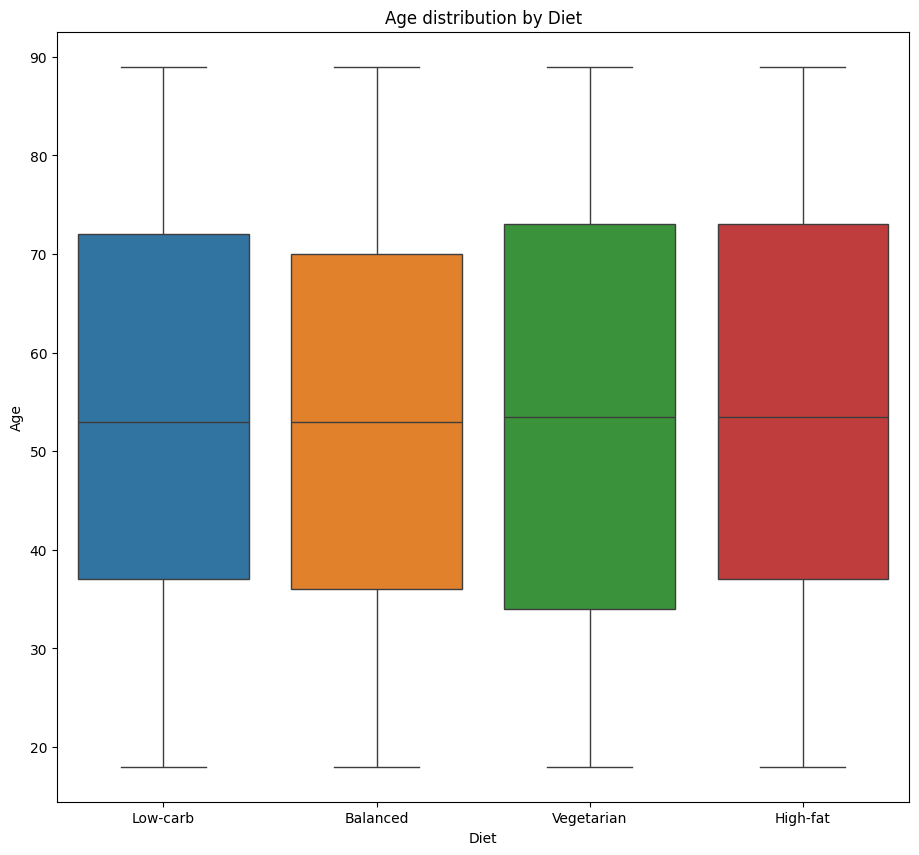

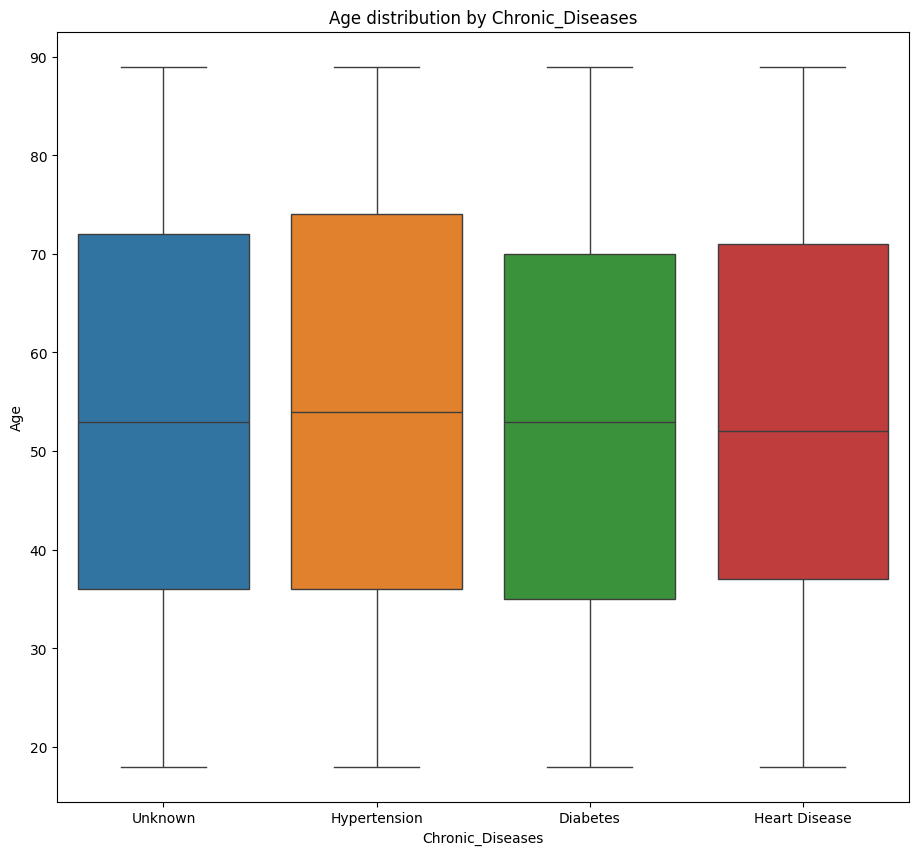

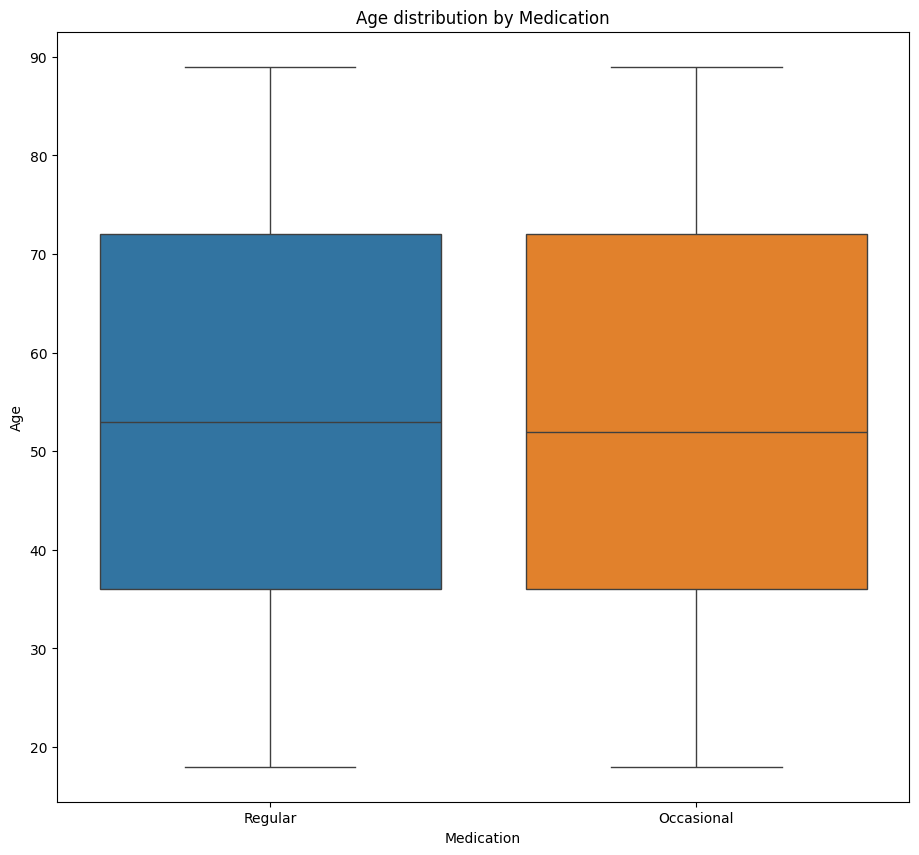

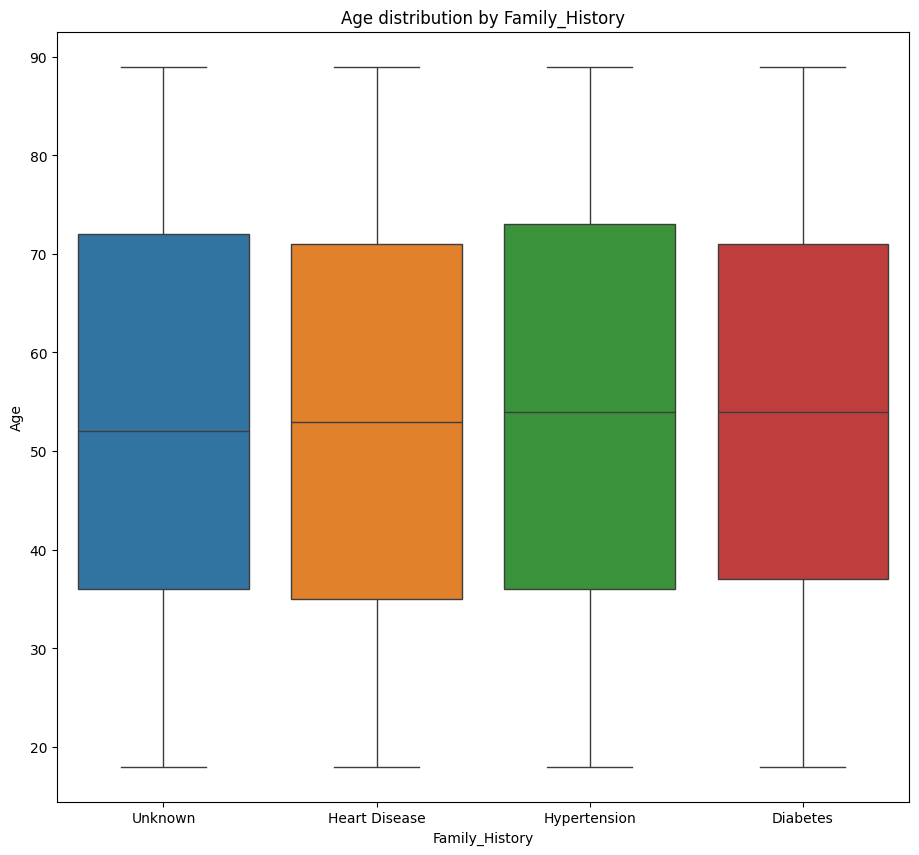

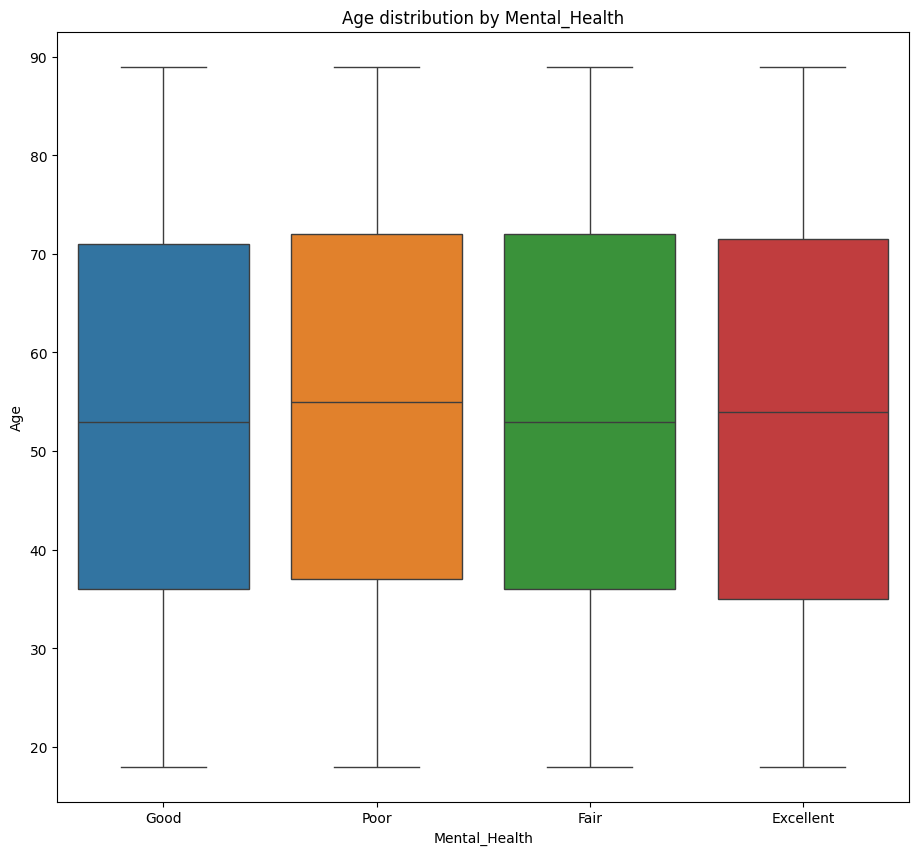

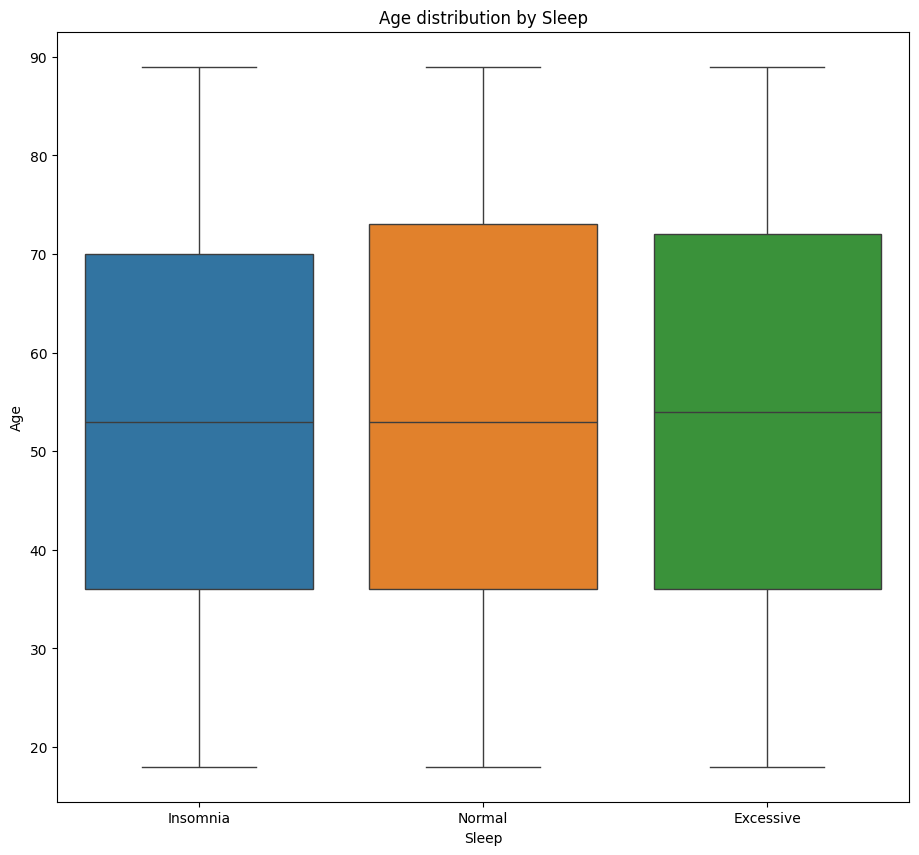

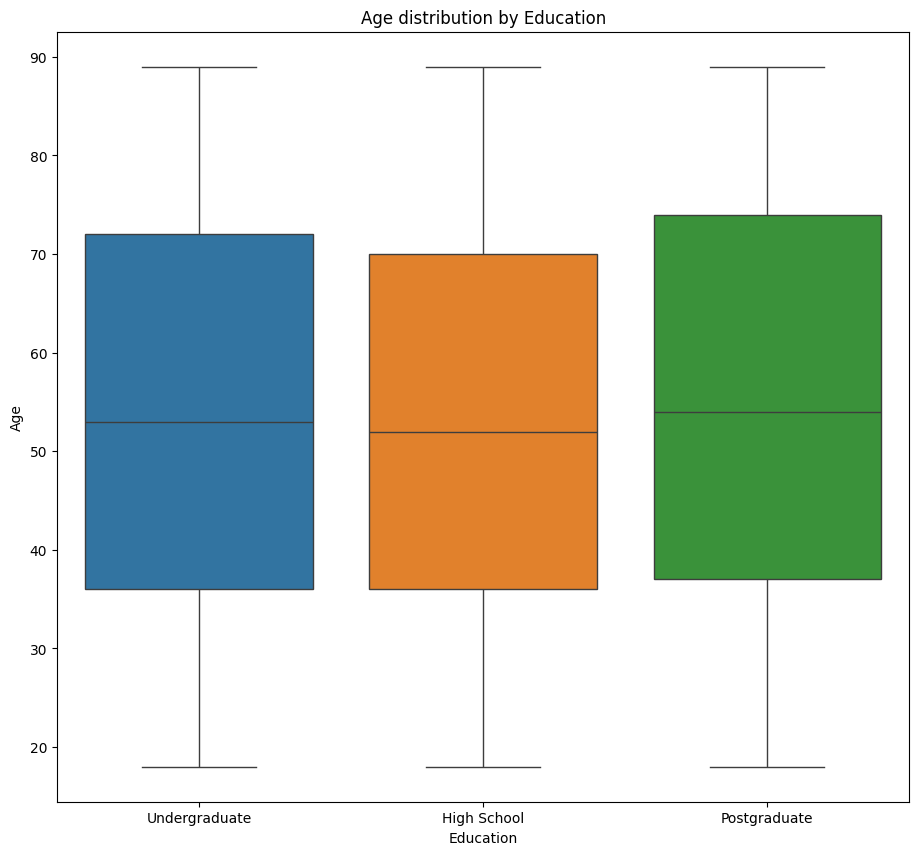

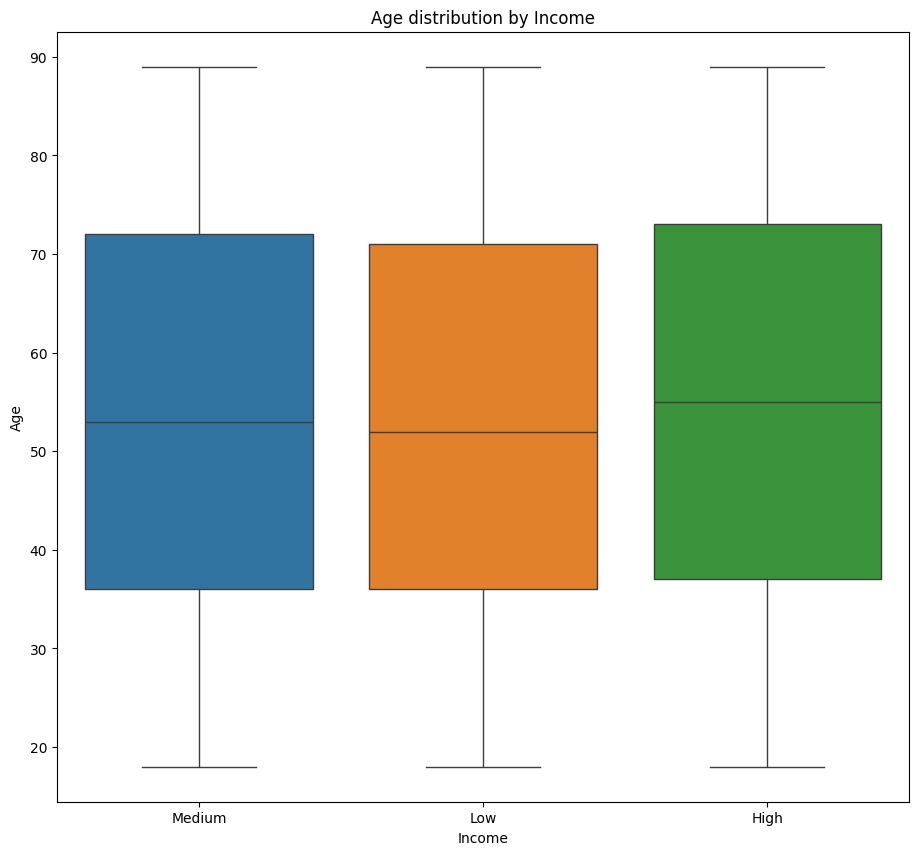

In [107]:
for category in categorical_features:
    f, ax = plt.subplots(figsize=(11,10))
    plt.title(f'Age distribution by {category}')
    sns.boxplot(data=df, y='Age', x=category, hue=category)
    plt.show()
    plt.close()   

### Các biến số


Age Distribution by Height:
                     count       mean        std   min    25%   50%    75%  \
Height_bin                                                                  
(141.13, 161.63]    750.0  53.061333  20.401942  18.0  36.00  53.0  71.00   
(161.63, 168.216]   750.0  53.017333  20.464524  18.0  35.25  53.0  71.00   
(168.216, 175.523]  750.0  53.685333  20.905846  18.0  36.25  53.0  72.00   
(175.523, 198.112]  750.0  54.178667  20.521507  18.0  36.00  55.0  72.75   

                     max  
Height_bin                
(141.13, 161.63]    89.0  
(161.63, 168.216]   89.0  
(168.216, 175.523]  89.0  
(175.523, 198.112]  89.0  


/tmp/ipykernel_32555/3279208213.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Height_bin,,,,,,,,
"(141.13, 161.63]",750.0,53.061333,20.401942,18.0,36.00,53.0,71.00,89.0
"(161.63, 168.216]",750.0,53.017333,20.464524,18.0,35.25,53.0,71.00,89.0
"(168.216, 175.523]",750.0,53.685333,20.905846,18.0,36.25,53.0,72.00,89.0
"(175.523, 198.112]",750.0,54.178667,20.521507,18.0,36.00,55.0,72.75,89.0


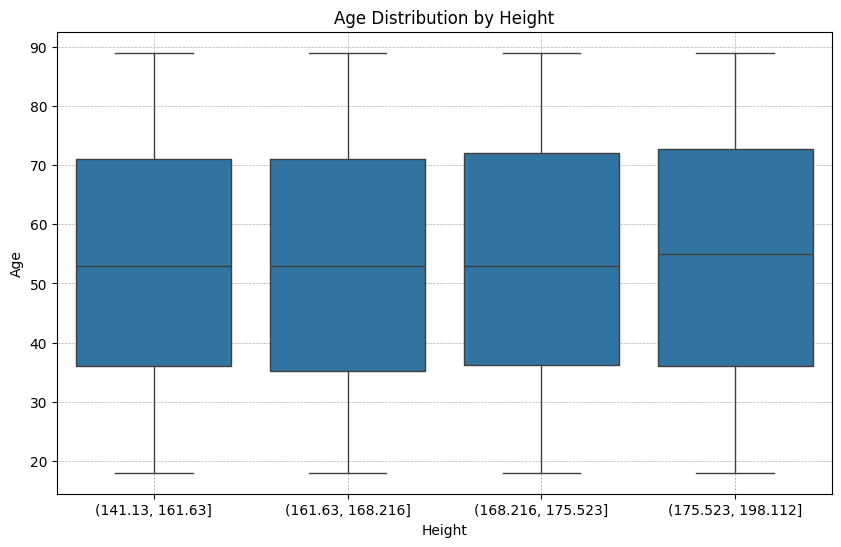


Age Distribution by Weight:
                    count       mean        std   min   25%   50%    75%   max
Weight_bin                                                                   
(32.537, 63.223]   750.0  53.492000  19.698849  18.0  38.0  53.0  71.00  89.0
(63.223, 71.449]   750.0  53.529333  20.894894  18.0  35.0  53.0  72.00  89.0
(71.449, 81.703]   750.0  53.358667  20.838322  18.0  36.0  53.0  72.00  89.0
(81.703, 123.599]  750.0  53.562667  20.862464  18.0  36.0  53.0  71.75  89.0


/tmp/ipykernel_32555/3279208213.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Weight_bin,,,,,,,,
"(32.537, 63.223]",750.0,53.492000,19.698849,18.0,38.0,53.0,71.00,89.0
"(63.223, 71.449]",750.0,53.529333,20.894894,18.0,35.0,53.0,72.00,89.0
"(71.449, 81.703]",750.0,53.358667,20.838322,18.0,36.0,53.0,72.00,89.0
"(81.703, 123.599]",750.0,53.562667,20.862464,18.0,36.0,53.0,71.75,89.0


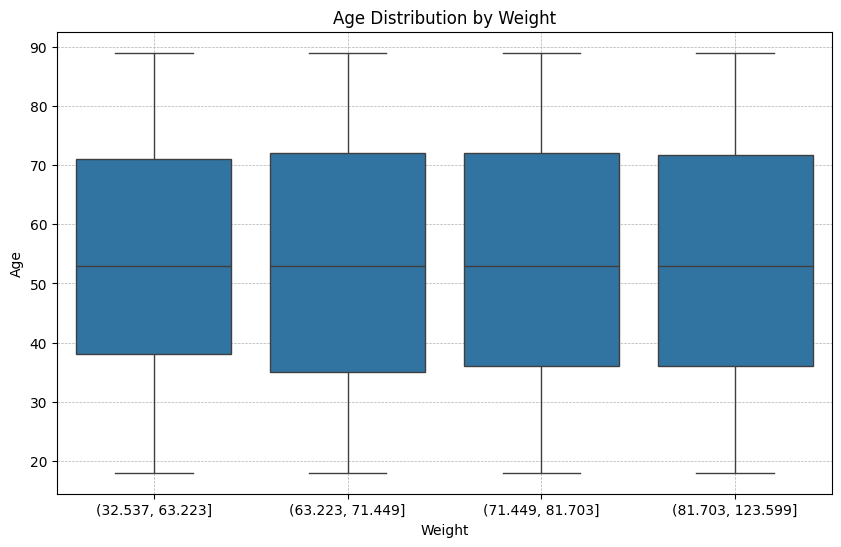


Age Distribution by Cholesterol:
                     count       mean        std   min   25%   50%   75%   max
Cholesterol_bin                                                              
(148.811, 216.757]  750.0  41.900000  17.888749  18.0  28.0  37.0  53.0  89.0
(216.757, 234.377]  750.0  50.137333  19.638823  18.0  34.0  49.0  66.0  89.0
(234.377, 250.647]  750.0  56.914667  19.168515  18.0  41.0  57.0  74.0  89.0
(250.647, 331.301]  750.0  64.990667  18.195384  18.0  52.0  69.0  80.0  89.0


/tmp/ipykernel_32555/3279208213.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Cholesterol_bin,,,,,,,,
"(148.811, 216.757]",750.0,41.900000,17.888749,18.0,28.0,37.0,53.0,89.0
"(216.757, 234.377]",750.0,50.137333,19.638823,18.0,34.0,49.0,66.0,89.0
"(234.377, 250.647]",750.0,56.914667,19.168515,18.0,41.0,57.0,74.0,89.0
"(250.647, 331.301]",750.0,64.990667,18.195384,18.0,52.0,69.0,80.0,89.0


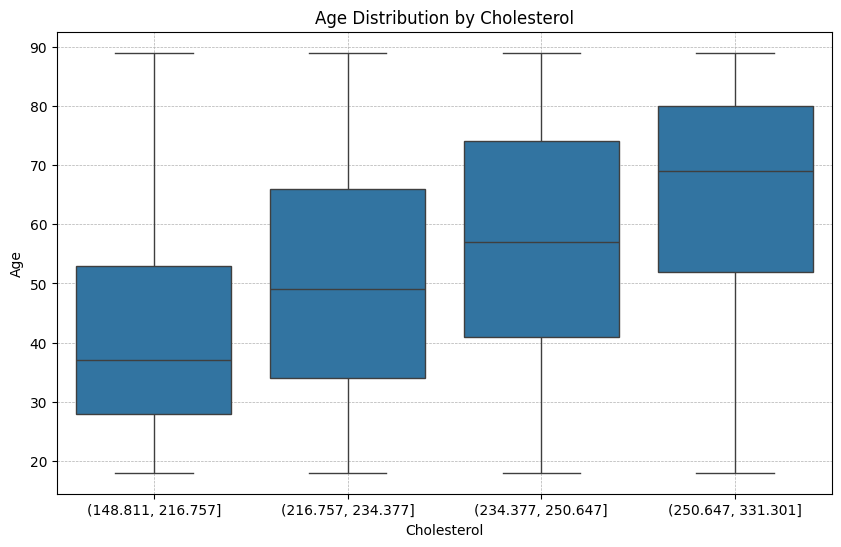


Age Distribution by BMI:
                               count       mean        std   min   25%   50%  \
BMI_bin                                                                       
(12.049000000000001, 22.454]  750.0  54.106667  20.096213  18.0  38.0  54.0   
(22.454, 25.352]              750.0  53.069333  20.395305  18.0  35.0  54.0   
(25.352, 28.404]              750.0  52.790667  20.601053  18.0  34.0  52.0   
(28.404, 43.33]               750.0  53.976000  21.180878  18.0  36.0  53.0   

                               75%   max  
BMI_bin                                   
(12.049000000000001, 22.454]  72.0  89.0  
(22.454, 25.352]              70.0  89.0  
(25.352, 28.404]              72.0  89.0  
(28.404, 43.33]               73.0  89.0  


/tmp/ipykernel_32555/3279208213.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
BMI_bin,,,,,,,,
"(12.049000000000001, 22.454]",750.0,54.106667,20.096213,18.0,38.0,54.0,72.0,89.0
"(22.454, 25.352]",750.0,53.069333,20.395305,18.0,35.0,54.0,70.0,89.0
"(25.352, 28.404]",750.0,52.790667,20.601053,18.0,34.0,52.0,72.0,89.0
"(28.404, 43.33]",750.0,53.976000,21.180878,18.0,36.0,53.0,73.0,89.0


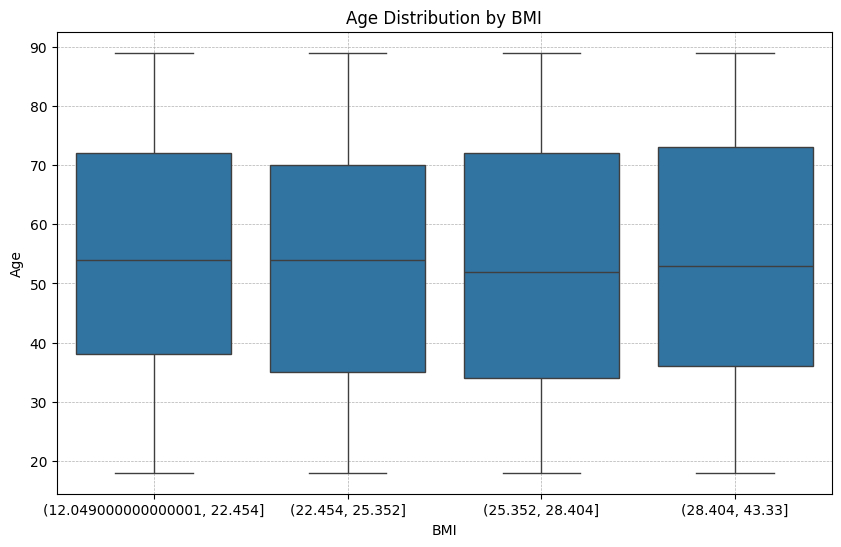


Age Distribution by Blood_Glucose:
                     count       mean        std   min    25%   50%   75%   max
Blood_Glucose_bin                                                             
(69.866, 114.393]   750.0  42.318667  18.154023  18.0  28.00  38.0  54.0  89.0
(114.393, 126.802]  750.0  50.480000  19.487876  18.0  35.00  50.0  66.0  89.0
(126.802, 139.377]  750.0  55.985333  19.384964  18.0  40.00  56.0  72.0  89.0
(139.377, 185.736]  750.0  65.158667  18.232079  18.0  52.25  70.0  80.0  89.0


/tmp/ipykernel_32555/3279208213.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Blood_Glucose_bin,,,,,,,,
"(69.866, 114.393]",750.0,42.318667,18.154023,18.0,28.00,38.0,54.0,89.0
"(114.393, 126.802]",750.0,50.480000,19.487876,18.0,35.00,50.0,66.0,89.0
"(126.802, 139.377]",750.0,55.985333,19.384964,18.0,40.00,56.0,72.0,89.0
"(139.377, 185.736]",750.0,65.158667,18.232079,18.0,52.25,70.0,80.0,89.0


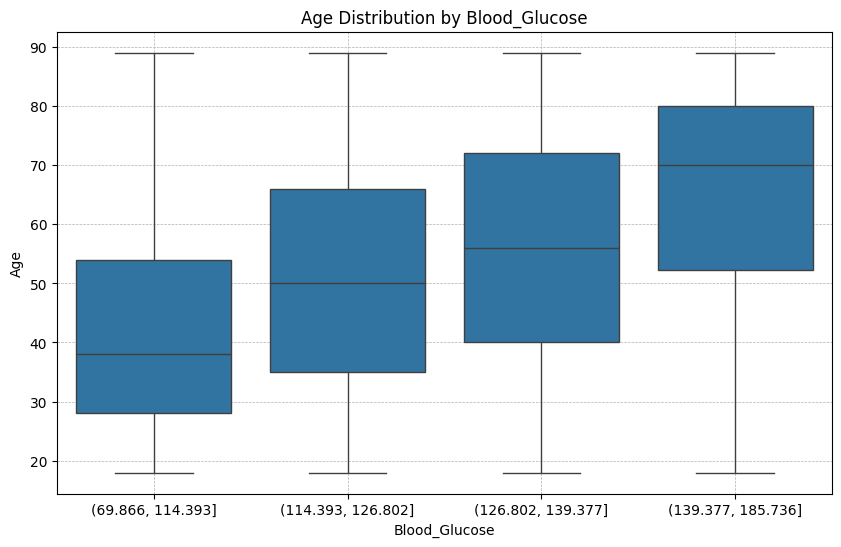


Age Distribution by Bone_Density:
                   count       mean       std   min   25%   50%   75%   max
Bone_Density_bin                                                          
(-0.221, 0.561]   750.0  78.885333  7.241047  52.0  74.0  79.0  85.0  89.0
(0.561, 0.94]     750.0  61.928000  9.415928  35.0  56.0  62.0  69.0  86.0
(0.94, 1.295]     750.0  44.529333  8.882774  19.0  38.0  44.0  50.0  72.0
(1.295, 2.0]      750.0  28.600000  7.505227  18.0  23.0  28.0  34.0  61.0


/tmp/ipykernel_32555/3279208213.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Bone_Density_bin,,,,,,,,
"(-0.221, 0.561]",750.0,78.885333,7.241047,52.0,74.0,79.0,85.0,89.0
"(0.561, 0.94]",750.0,61.928000,9.415928,35.0,56.0,62.0,69.0,86.0
"(0.94, 1.295]",750.0,44.529333,8.882774,19.0,38.0,44.0,50.0,72.0
"(1.295, 2.0]",750.0,28.600000,7.505227,18.0,23.0,28.0,34.0,61.0


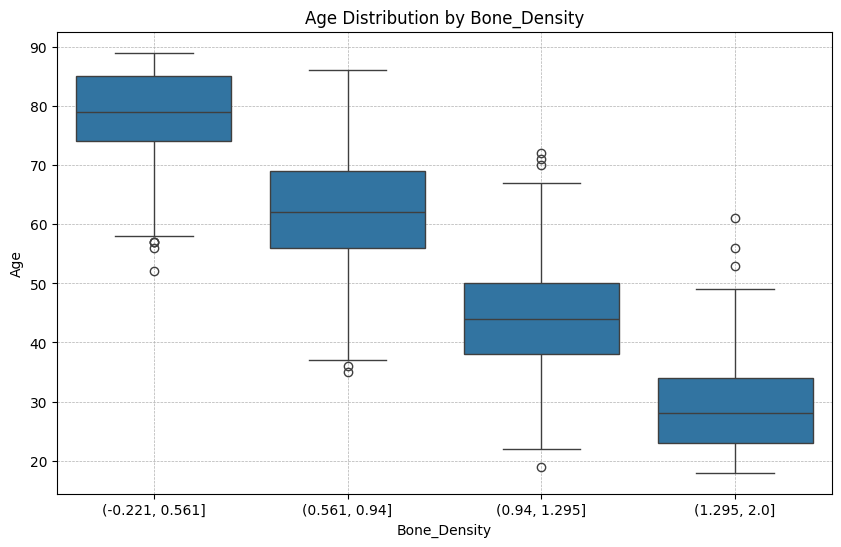


Age Distribution by Vision:
                 count       mean        std   min   25%   50%   75%   max
Vision_bin                                                               
(0.199, 0.282]  750.0  77.848000   8.160823  47.0  73.0  79.0  84.0  89.0
(0.282, 0.462]  750.0  61.882667  11.077448  27.0  54.0  61.0  70.0  89.0
(0.462, 0.639]  750.0  44.477333  10.922174  19.0  37.0  44.0  52.0  82.0
(0.639, 1.063]  750.0  29.734667   8.631315  18.0  23.0  28.0  35.0  61.0


/tmp/ipykernel_32555/3279208213.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Vision_bin,,,,,,,,
"(0.199, 0.282]",750.0,77.848000,8.160823,47.0,73.0,79.0,84.0,89.0
"(0.282, 0.462]",750.0,61.882667,11.077448,27.0,54.0,61.0,70.0,89.0
"(0.462, 0.639]",750.0,44.477333,10.922174,19.0,37.0,44.0,52.0,82.0
"(0.639, 1.063]",750.0,29.734667,8.631315,18.0,23.0,28.0,35.0,61.0


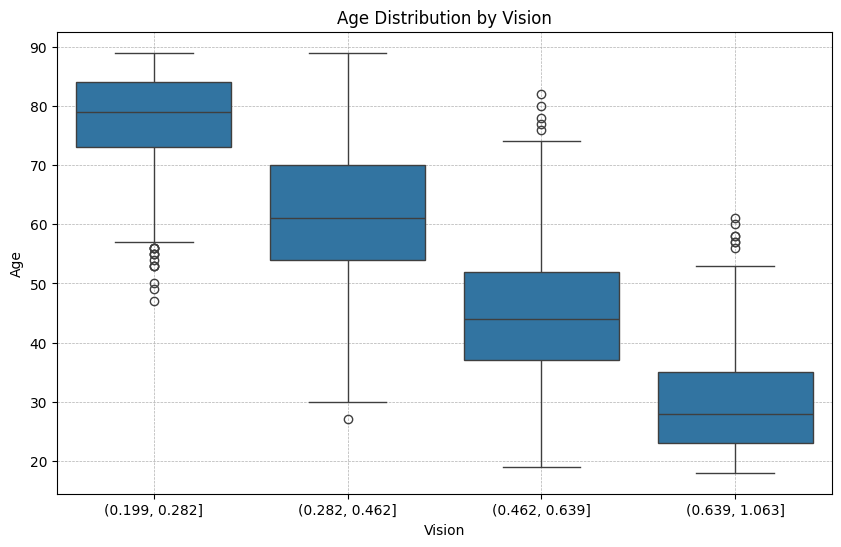


Age Distribution by Hearing:
                   count       mean        std   min   25%   50%   75%   max
Hearing_bin                                                                
(-0.001, 36.735]  750.0  35.086667  13.240477  18.0  24.0  33.0  44.0  88.0
(36.735, 46.964]  750.0  46.490667  16.253805  18.0  34.0  45.0  58.0  89.0
(46.964, 56.829]  750.0  59.572000  16.900068  18.0  47.0  61.0  73.0  89.0
(56.829, 94.004]  750.0  72.793333  13.064744  24.0  65.0  76.0  83.0  89.0


/tmp/ipykernel_32555/3279208213.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Hearing_bin,,,,,,,,
"(-0.001, 36.735]",750.0,35.086667,13.240477,18.0,24.0,33.0,44.0,88.0
"(36.735, 46.964]",750.0,46.490667,16.253805,18.0,34.0,45.0,58.0,89.0
"(46.964, 56.829]",750.0,59.572000,16.900068,18.0,47.0,61.0,73.0,89.0
"(56.829, 94.004]",750.0,72.793333,13.064744,24.0,65.0,76.0,83.0,89.0


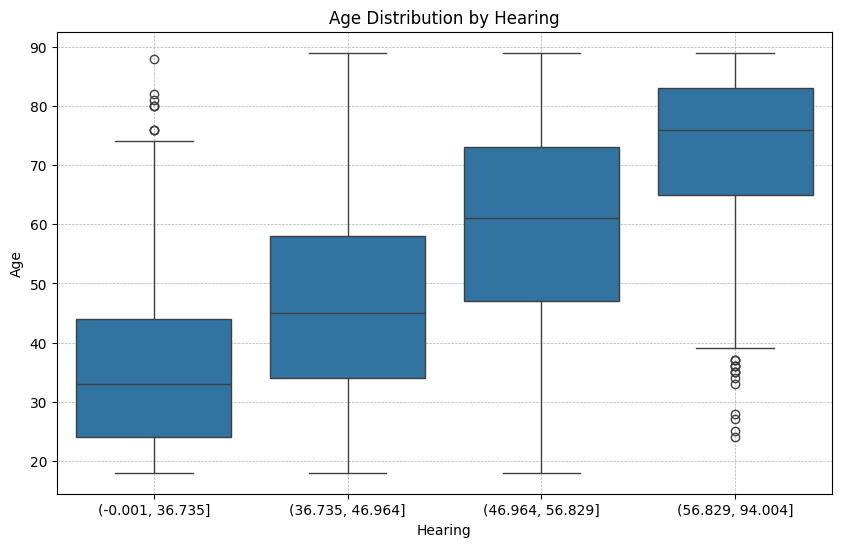


Age Distribution by Cognitive_Function:
                         count       mean        std   min   25%   50%    75%  \
Cognitive_Function_bin                                                         
(30.381, 55.648]        750.0  66.890667  17.235471  18.0  56.0  71.0  81.00   
(55.648, 64.015]        750.0  58.201333  18.974602  18.0  44.0  58.5  75.00   
(64.015, 72.087]        750.0  48.765333  19.183977  18.0  33.0  47.0  64.00   
(72.087, 106.48]        750.0  40.085333  16.269613  18.0  27.0  37.0  50.75   

                         max  
Cognitive_Function_bin        
(30.381, 55.648]        89.0  
(55.648, 64.015]        89.0  
(64.015, 72.087]        89.0  
(72.087, 106.48]        89.0  


/tmp/ipykernel_32555/3279208213.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Cognitive_Function_bin,,,,,,,,
"(30.381, 55.648]",750.0,66.890667,17.235471,18.0,56.0,71.0,81.00,89.0
"(55.648, 64.015]",750.0,58.201333,18.974602,18.0,44.0,58.5,75.00,89.0
"(64.015, 72.087]",750.0,48.765333,19.183977,18.0,33.0,47.0,64.00,89.0
"(72.087, 106.48]",750.0,40.085333,16.269613,18.0,27.0,37.0,50.75,89.0


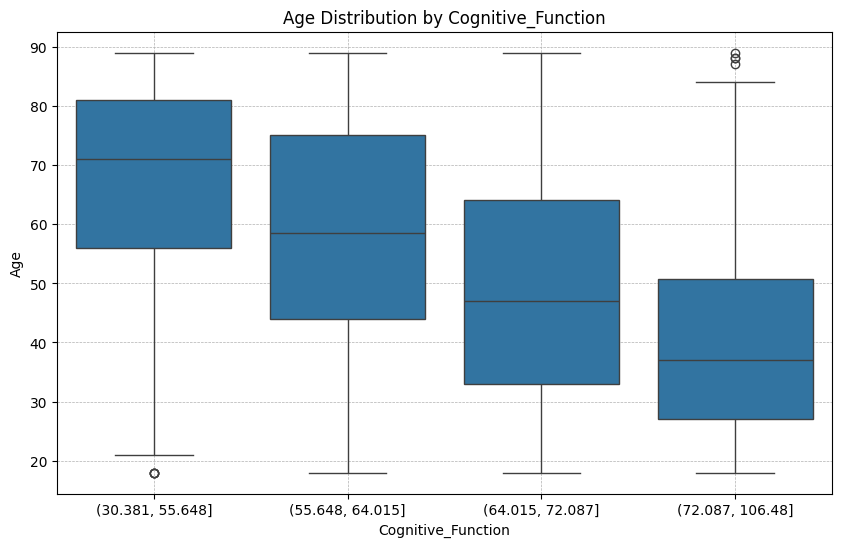


Age Distribution by Stress:
                 count       mean        std   min   25%   50%    75%   max
Stress_bin                                                                
(0.999, 3.222]  750.0  52.334667  20.538316  18.0  34.0  52.0  70.00  89.0
(3.222, 5.497]  750.0  54.044000  20.745181  18.0  36.0  54.0  72.00  89.0
(5.497, 7.68]   750.0  53.250667  20.695351  18.0  36.0  53.0  72.00  89.0
(7.68, 9.996]   750.0  54.313333  20.280061  18.0  38.0  54.0  72.75  89.0


/tmp/ipykernel_32555/3279208213.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Stress_bin,,,,,,,,
"(0.999, 3.222]",750.0,52.334667,20.538316,18.0,34.0,52.0,70.00,89.0
"(3.222, 5.497]",750.0,54.044000,20.745181,18.0,36.0,54.0,72.00,89.0
"(5.497, 7.68]",750.0,53.250667,20.695351,18.0,36.0,53.0,72.00,89.0
"(7.68, 9.996]",750.0,54.313333,20.280061,18.0,38.0,54.0,72.75,89.0


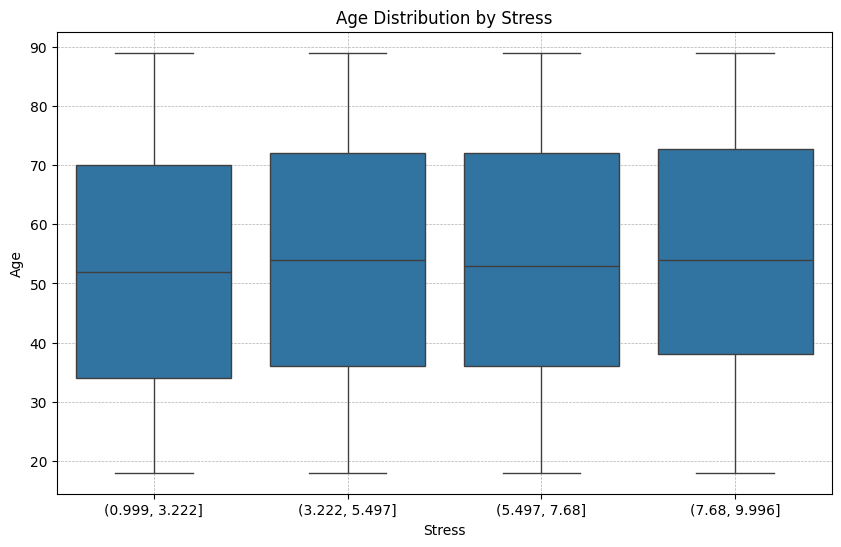


Age Distribution by Pollution:
                   count       mean        std   min   25%   50%   75%   max
Pollution_bin                                                              
(0.00539, 2.607]  750.0  53.862667  20.528103  18.0  36.0  54.0  71.0  89.0
(2.607, 5.096]    750.0  53.180000  21.294637  18.0  34.0  53.0  73.0  89.0
(5.096, 7.476]    750.0  53.468000  19.795575  18.0  37.0  53.0  71.0  89.0
(7.476, 9.998]    750.0  53.432000  20.668211  18.0  37.0  53.0  72.0  89.0


/tmp/ipykernel_32555/3279208213.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Pollution_bin,,,,,,,,
"(0.00539, 2.607]",750.0,53.862667,20.528103,18.0,36.0,54.0,71.0,89.0
"(2.607, 5.096]",750.0,53.180000,21.294637,18.0,34.0,53.0,73.0,89.0
"(5.096, 7.476]",750.0,53.468000,19.795575,18.0,37.0,53.0,71.0,89.0
"(7.476, 9.998]",750.0,53.432000,20.668211,18.0,37.0,53.0,72.0,89.0


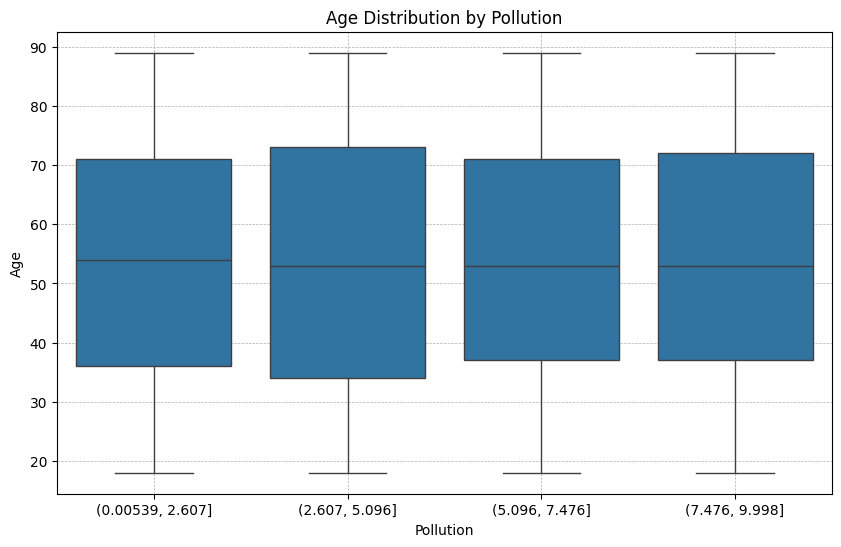


Age Distribution by Sun_Exposure:
                                 count       mean        std   min   25%   50%  \
Sun_Exposure_bin                                                                
(0.0010600000000000002, 2.873]  750.0  52.442667  20.049906  18.0  35.0  53.0   
(2.873, 5.957]                  750.0  54.157333  20.730692  18.0  37.0  54.0   
(5.957, 8.991]                  750.0  54.165333  20.627133  18.0  37.0  54.0   
(8.991, 11.993]                 750.0  53.177333  20.851993  18.0  35.0  53.0   

                                 75%   max  
Sun_Exposure_bin                            
(0.0010600000000000002, 2.873]  69.0  89.0  
(2.873, 5.957]                  73.0  89.0  
(5.957, 8.991]                  73.0  89.0  
(8.991, 11.993]                 71.0  89.0  


/tmp/ipykernel_32555/3279208213.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Sun_Exposure_bin,,,,,,,,
"(0.0010600000000000002, 2.873]",750.0,52.442667,20.049906,18.0,35.0,53.0,69.0,89.0
"(2.873, 5.957]",750.0,54.157333,20.730692,18.0,37.0,54.0,73.0,89.0
"(5.957, 8.991]",750.0,54.165333,20.627133,18.0,37.0,54.0,73.0,89.0
"(8.991, 11.993]",750.0,53.177333,20.851993,18.0,35.0,53.0,71.0,89.0


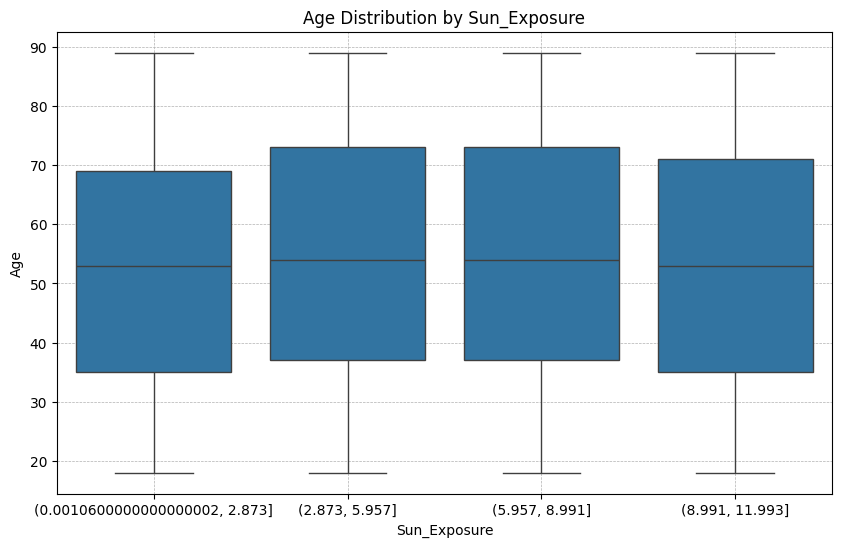


Age Distribution by Systolic_BP:
                  count       mean        std   min   25%   50%   75%   max
Systolic_BP_bin                                                           
(96.999, 135.0]  790.0  36.981013  14.836187  18.0  26.0  34.0  45.0  89.0
(135.0, 146.0]   754.0  48.014589  16.831200  18.0  35.0  47.0  60.0  89.0
(146.0, 157.0]   707.0  58.643564  18.187884  18.0  45.0  60.0  74.0  89.0
(157.0, 193.0]   749.0  71.532710  14.059673  21.0  64.0  75.0  82.0  89.0


/tmp/ipykernel_32555/3279208213.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Systolic_BP_bin,,,,,,,,
"(96.999, 135.0]",790.0,36.981013,14.836187,18.0,26.0,34.0,45.0,89.0
"(135.0, 146.0]",754.0,48.014589,16.831200,18.0,35.0,47.0,60.0,89.0
"(146.0, 157.0]",707.0,58.643564,18.187884,18.0,45.0,60.0,74.0,89.0
"(157.0, 193.0]",749.0,71.532710,14.059673,21.0,64.0,75.0,82.0,89.0


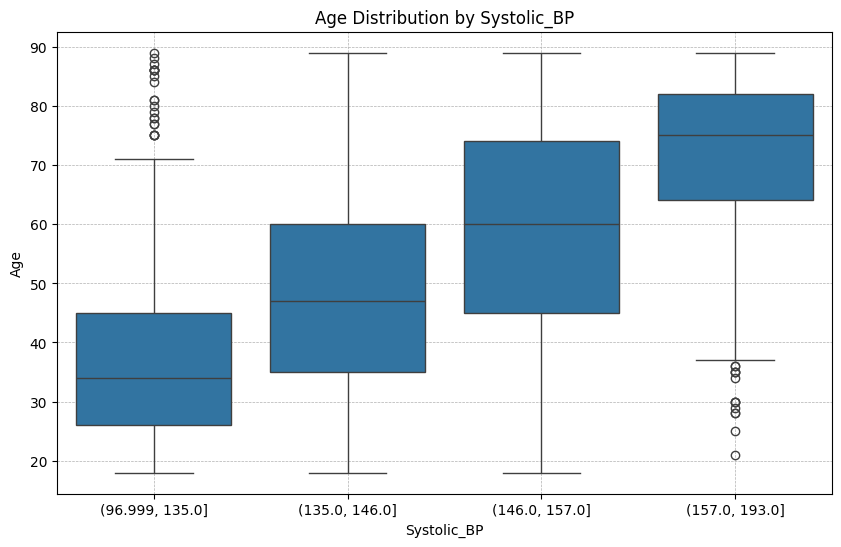


Age Distribution by Diastolic_BP:
                   count       mean        std   min   25%   50%   75%   max
Diastolic_BP_bin                                                           
(59.999, 89.0]    825.0  37.881212  15.445659  18.0  26.0  35.0  46.0  89.0
(89.0, 95.0]      694.0  48.778098  17.921177  18.0  34.0  47.0  61.0  89.0
(95.0, 103.0]     827.0  59.418380  18.340446  18.0  46.0  61.0  75.0  89.0
(103.0, 133.0]    654.0  70.663609  14.301608  22.0  62.0  74.0  82.0  89.0


/tmp/ipykernel_32555/3279208213.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Diastolic_BP_bin,,,,,,,,
"(59.999, 89.0]",825.0,37.881212,15.445659,18.0,26.0,35.0,46.0,89.0
"(89.0, 95.0]",694.0,48.778098,17.921177,18.0,34.0,47.0,61.0,89.0
"(95.0, 103.0]",827.0,59.418380,18.340446,18.0,46.0,61.0,75.0,89.0
"(103.0, 133.0]",654.0,70.663609,14.301608,22.0,62.0,74.0,82.0,89.0


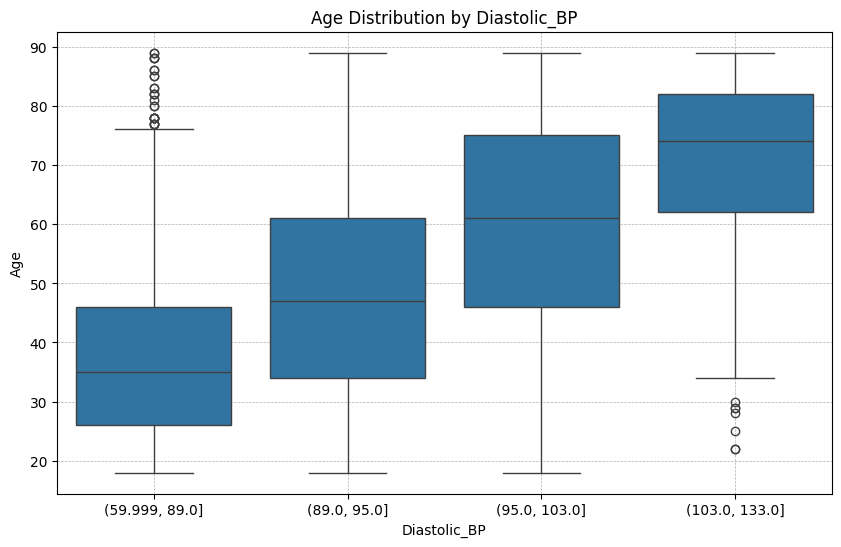

In [108]:
num_bins = 4  
age_distribution_tables = {}

for col in numeric_columns:
    if col != 'Age': 
        data[f'{col}_bin'] = pd.qcut(data[col], q=num_bins, duplicates='drop')

        summary_stats = data.groupby(f'{col}_bin')['Age'].describe()

        age_distribution_tables[col] = summary_stats
        print(f"\nAge Distribution by {col}:\n", summary_stats)
        display(summary_stats)

        plt.figure(figsize=(10, 6))
        sns.boxplot(data=data, x=f'{col}_bin', y='Age')
        plt.title(f'Age Distribution by {col}')
        plt.xlabel(f'{col}')
        plt.ylabel('Age')
        plt.xticks(rotation=0)
        plt.grid(linestyle="--", linewidth=0.5)
        plt.show()

### thay thế các giá trị nhỏ hơn cận dưới bằng cận dưới, lớn hơn cận trên bằng cận trên


Age Distribution by Height:
                     count       mean        std   min    25%   50%    75%  \
Height_bin                                                                  
(141.13, 161.63]    750.0  53.061333  20.401942  18.0  36.00  53.0  71.00   
(161.63, 168.216]   750.0  53.017333  20.464524  18.0  35.25  53.0  71.00   
(168.216, 175.523]  750.0  53.685333  20.905846  18.0  36.25  53.0  72.00   
(175.523, 196.362]  750.0  54.178667  20.521507  18.0  36.00  55.0  72.75   

                     max  
Height_bin                
(141.13, 161.63]    89.0  
(161.63, 168.216]   89.0  
(168.216, 175.523]  89.0  
(175.523, 196.362]  89.0  


/tmp/ipykernel_32555/4134245270.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = capped_data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Height_bin,,,,,,,,
"(141.13, 161.63]",750.0,53.061333,20.401942,18.0,36.00,53.0,71.00,89.0
"(161.63, 168.216]",750.0,53.017333,20.464524,18.0,35.25,53.0,71.00,89.0
"(168.216, 175.523]",750.0,53.685333,20.905846,18.0,36.25,53.0,72.00,89.0
"(175.523, 196.362]",750.0,54.178667,20.521507,18.0,36.00,55.0,72.75,89.0


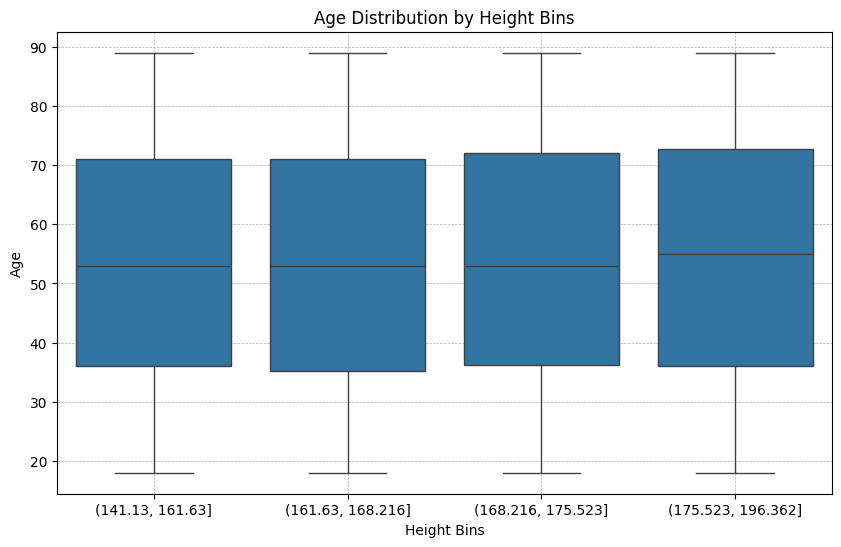


Age Distribution by Weight:
                    count       mean        std   min   25%   50%    75%   max
Weight_bin                                                                   
(35.502, 63.223]   750.0  53.492000  19.698849  18.0  38.0  53.0  71.00  89.0
(63.223, 71.449]   750.0  53.529333  20.894894  18.0  35.0  53.0  72.00  89.0
(71.449, 81.703]   750.0  53.358667  20.838322  18.0  36.0  53.0  72.00  89.0
(81.703, 109.423]  750.0  53.562667  20.862464  18.0  36.0  53.0  71.75  89.0


/tmp/ipykernel_32555/4134245270.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = capped_data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Weight_bin,,,,,,,,
"(35.502, 63.223]",750.0,53.492000,19.698849,18.0,38.0,53.0,71.00,89.0
"(63.223, 71.449]",750.0,53.529333,20.894894,18.0,35.0,53.0,72.00,89.0
"(71.449, 81.703]",750.0,53.358667,20.838322,18.0,36.0,53.0,72.00,89.0
"(81.703, 109.423]",750.0,53.562667,20.862464,18.0,36.0,53.0,71.75,89.0


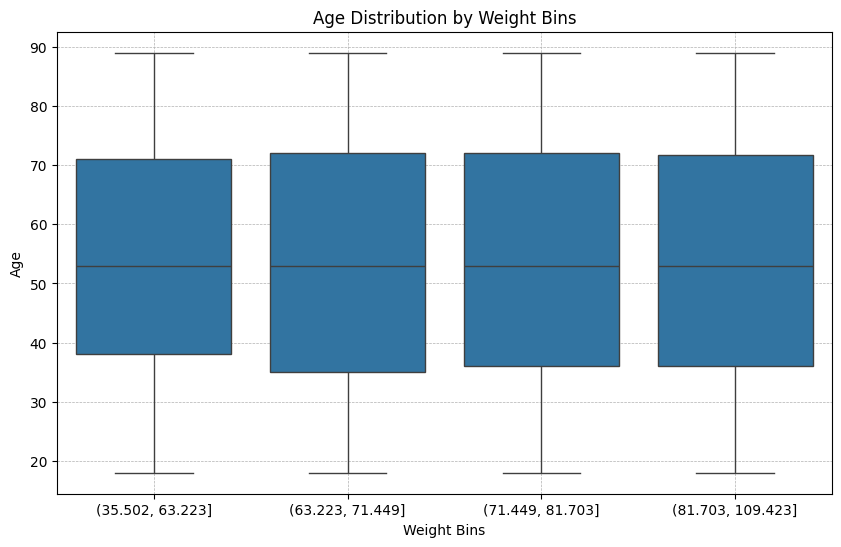


Age Distribution by Cholesterol:
                     count       mean        std   min   25%   50%   75%   max
Cholesterol_bin                                                              
(165.92, 216.757]   750.0  41.900000  17.888749  18.0  28.0  37.0  53.0  89.0
(216.757, 234.377]  750.0  50.137333  19.638823  18.0  34.0  49.0  66.0  89.0
(234.377, 250.647]  750.0  56.914667  19.168515  18.0  41.0  57.0  74.0  89.0
(250.647, 301.482]  750.0  64.990667  18.195384  18.0  52.0  69.0  80.0  89.0


/tmp/ipykernel_32555/4134245270.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = capped_data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Cholesterol_bin,,,,,,,,
"(165.92, 216.757]",750.0,41.900000,17.888749,18.0,28.0,37.0,53.0,89.0
"(216.757, 234.377]",750.0,50.137333,19.638823,18.0,34.0,49.0,66.0,89.0
"(234.377, 250.647]",750.0,56.914667,19.168515,18.0,41.0,57.0,74.0,89.0
"(250.647, 301.482]",750.0,64.990667,18.195384,18.0,52.0,69.0,80.0,89.0


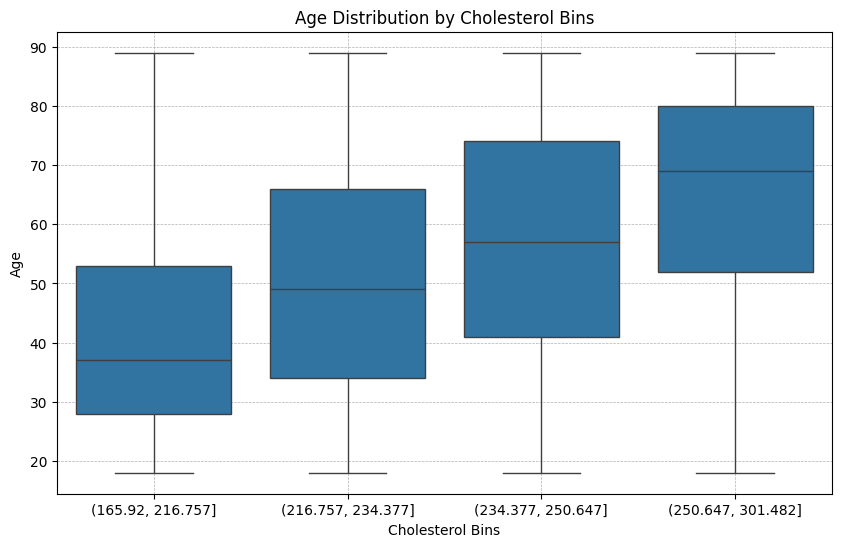


Age Distribution by BMI:
                   count       mean        std   min   25%   50%   75%   max
BMI_bin                                                                    
(13.529, 22.454]  750.0  54.106667  20.096213  18.0  38.0  54.0  72.0  89.0
(22.454, 25.352]  750.0  53.069333  20.395305  18.0  35.0  54.0  70.0  89.0
(25.352, 28.404]  750.0  52.790667  20.601053  18.0  34.0  52.0  72.0  89.0
(28.404, 37.328]  750.0  53.976000  21.180878  18.0  36.0  53.0  73.0  89.0


/tmp/ipykernel_32555/4134245270.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = capped_data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
BMI_bin,,,,,,,,
"(13.529, 22.454]",750.0,54.106667,20.096213,18.0,38.0,54.0,72.0,89.0
"(22.454, 25.352]",750.0,53.069333,20.395305,18.0,35.0,54.0,70.0,89.0
"(25.352, 28.404]",750.0,52.790667,20.601053,18.0,34.0,52.0,72.0,89.0
"(28.404, 37.328]",750.0,53.976000,21.180878,18.0,36.0,53.0,73.0,89.0


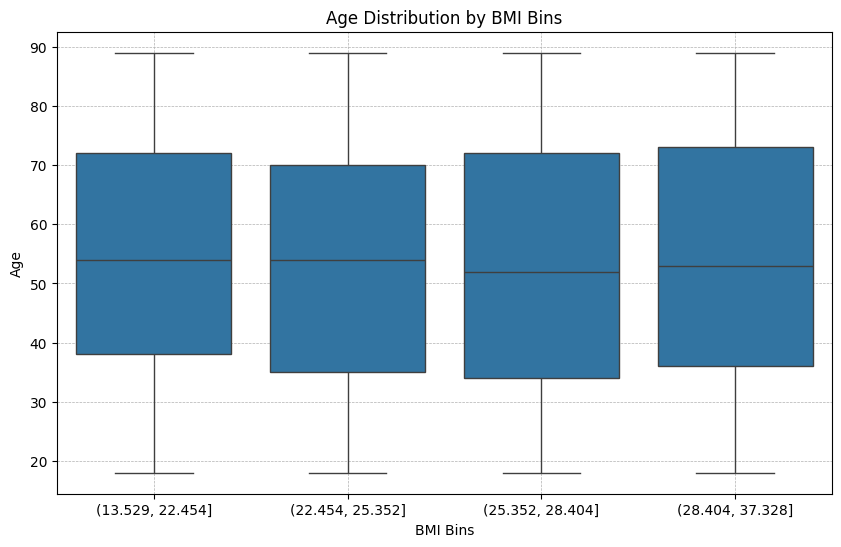


Age Distribution by Blood_Glucose:
                               count       mean        std   min    25%   50%  \
Blood_Glucose_bin                                                              
(76.91499999999999, 114.393]  750.0  42.318667  18.154023  18.0  28.00  38.0   
(114.393, 126.802]            750.0  50.480000  19.487876  18.0  35.00  50.0   
(126.802, 139.377]            750.0  55.985333  19.384964  18.0  40.00  56.0   
(139.377, 176.854]            750.0  65.158667  18.232079  18.0  52.25  70.0   

                               75%   max  
Blood_Glucose_bin                         
(76.91499999999999, 114.393]  54.0  89.0  
(114.393, 126.802]            66.0  89.0  
(126.802, 139.377]            72.0  89.0  
(139.377, 176.854]            80.0  89.0  


/tmp/ipykernel_32555/4134245270.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = capped_data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Blood_Glucose_bin,,,,,,,,
"(76.91499999999999, 114.393]",750.0,42.318667,18.154023,18.0,28.00,38.0,54.0,89.0
"(114.393, 126.802]",750.0,50.480000,19.487876,18.0,35.00,50.0,66.0,89.0
"(126.802, 139.377]",750.0,55.985333,19.384964,18.0,40.00,56.0,72.0,89.0
"(139.377, 176.854]",750.0,65.158667,18.232079,18.0,52.25,70.0,80.0,89.0


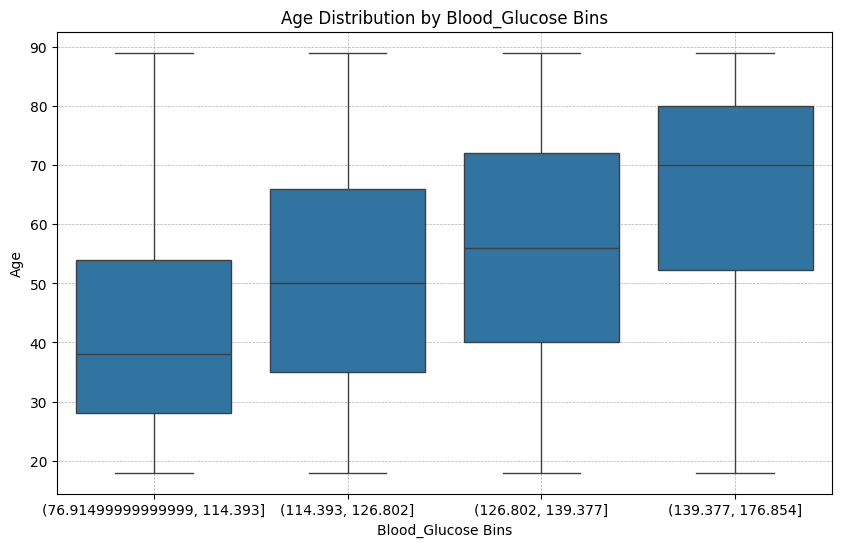


Age Distribution by Bone_Density:
                   count       mean       std   min   25%   50%   75%   max
Bone_Density_bin                                                          
(-0.221, 0.561]   750.0  78.885333  7.241047  52.0  74.0  79.0  85.0  89.0
(0.561, 0.94]     750.0  61.928000  9.415928  35.0  56.0  62.0  69.0  86.0
(0.94, 1.295]     750.0  44.529333  8.882774  19.0  38.0  44.0  50.0  72.0
(1.295, 2.0]      750.0  28.600000  7.505227  18.0  23.0  28.0  34.0  61.0


/tmp/ipykernel_32555/4134245270.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = capped_data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Bone_Density_bin,,,,,,,,
"(-0.221, 0.561]",750.0,78.885333,7.241047,52.0,74.0,79.0,85.0,89.0
"(0.561, 0.94]",750.0,61.928000,9.415928,35.0,56.0,62.0,69.0,86.0
"(0.94, 1.295]",750.0,44.529333,8.882774,19.0,38.0,44.0,50.0,72.0
"(1.295, 2.0]",750.0,28.600000,7.505227,18.0,23.0,28.0,34.0,61.0


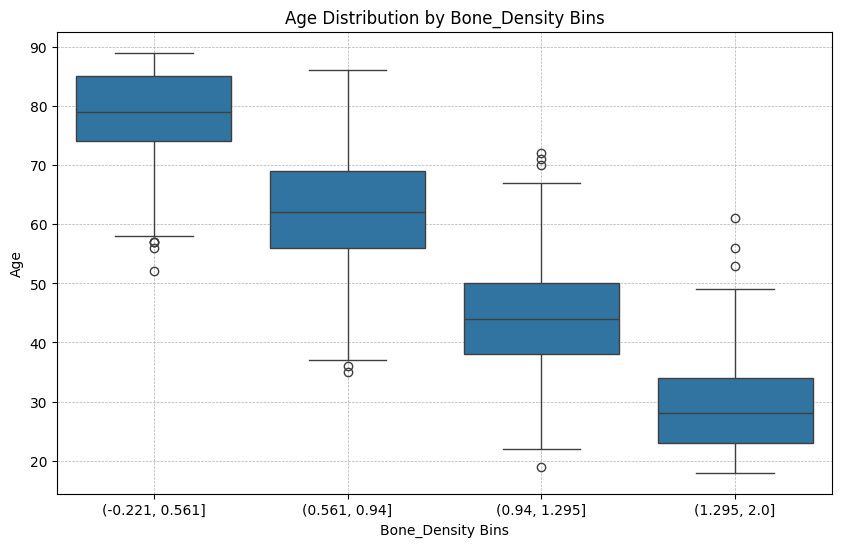


Age Distribution by Vision:
                 count       mean        std   min   25%   50%   75%   max
Vision_bin                                                               
(0.199, 0.282]  750.0  77.848000   8.160823  47.0  73.0  79.0  84.0  89.0
(0.282, 0.462]  750.0  61.882667  11.077448  27.0  54.0  61.0  70.0  89.0
(0.462, 0.639]  750.0  44.477333  10.922174  19.0  37.0  44.0  52.0  82.0
(0.639, 1.063]  750.0  29.734667   8.631315  18.0  23.0  28.0  35.0  61.0


/tmp/ipykernel_32555/4134245270.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = capped_data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Vision_bin,,,,,,,,
"(0.199, 0.282]",750.0,77.848000,8.160823,47.0,73.0,79.0,84.0,89.0
"(0.282, 0.462]",750.0,61.882667,11.077448,27.0,54.0,61.0,70.0,89.0
"(0.462, 0.639]",750.0,44.477333,10.922174,19.0,37.0,44.0,52.0,82.0
"(0.639, 1.063]",750.0,29.734667,8.631315,18.0,23.0,28.0,35.0,61.0


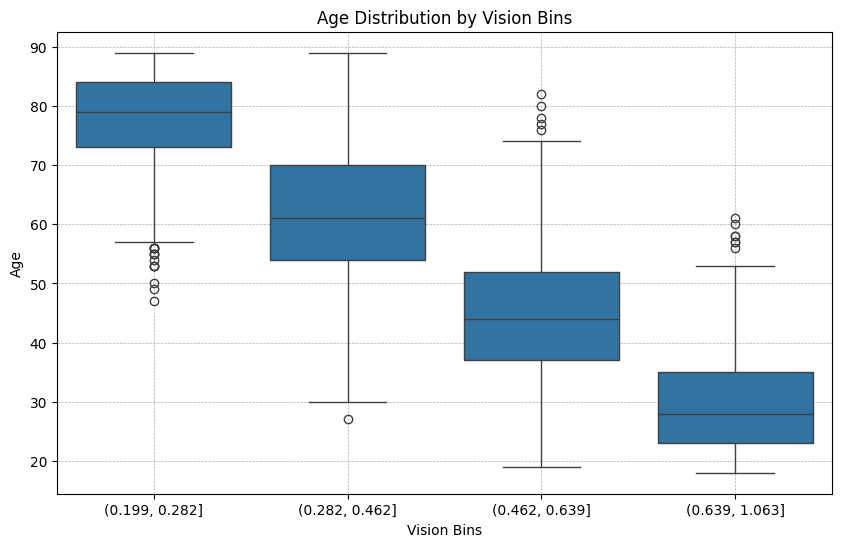


Age Distribution by Hearing:
                   count       mean        std   min   25%   50%   75%   max
Hearing_bin                                                                
(6.593, 36.735]   750.0  35.086667  13.240477  18.0  24.0  33.0  44.0  88.0
(36.735, 46.964]  750.0  46.490667  16.253805  18.0  34.0  45.0  58.0  89.0
(46.964, 56.829]  750.0  59.572000  16.900068  18.0  47.0  61.0  73.0  89.0
(56.829, 86.97]   750.0  72.793333  13.064744  24.0  65.0  76.0  83.0  89.0


/tmp/ipykernel_32555/4134245270.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = capped_data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Hearing_bin,,,,,,,,
"(6.593, 36.735]",750.0,35.086667,13.240477,18.0,24.0,33.0,44.0,88.0
"(36.735, 46.964]",750.0,46.490667,16.253805,18.0,34.0,45.0,58.0,89.0
"(46.964, 56.829]",750.0,59.572000,16.900068,18.0,47.0,61.0,73.0,89.0
"(56.829, 86.97]",750.0,72.793333,13.064744,24.0,65.0,76.0,83.0,89.0


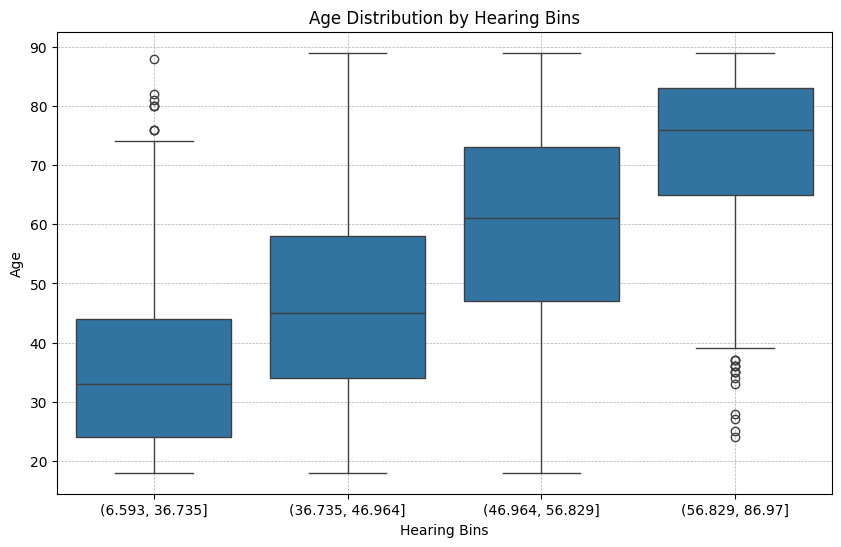


Age Distribution by Cognitive_Function:
                         count       mean        std   min   25%   50%    75%  \
Cognitive_Function_bin                                                         
(30.987, 55.648]        750.0  66.890667  17.235471  18.0  56.0  71.0  81.00   
(55.648, 64.015]        750.0  58.201333  18.974602  18.0  44.0  58.5  75.00   
(64.015, 72.087]        750.0  48.765333  19.183977  18.0  33.0  47.0  64.00   
(72.087, 96.747]        750.0  40.085333  16.269613  18.0  27.0  37.0  50.75   

                         max  
Cognitive_Function_bin        
(30.987, 55.648]        89.0  
(55.648, 64.015]        89.0  
(64.015, 72.087]        89.0  
(72.087, 96.747]        89.0  


/tmp/ipykernel_32555/4134245270.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = capped_data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Cognitive_Function_bin,,,,,,,,
"(30.987, 55.648]",750.0,66.890667,17.235471,18.0,56.0,71.0,81.00,89.0
"(55.648, 64.015]",750.0,58.201333,18.974602,18.0,44.0,58.5,75.00,89.0
"(64.015, 72.087]",750.0,48.765333,19.183977,18.0,33.0,47.0,64.00,89.0
"(72.087, 96.747]",750.0,40.085333,16.269613,18.0,27.0,37.0,50.75,89.0


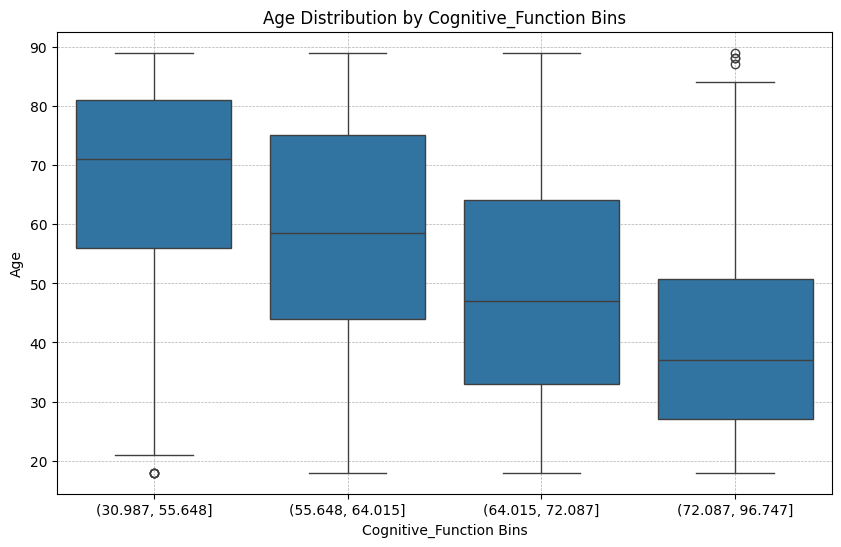


Age Distribution by Stress:
                 count       mean        std   min   25%   50%    75%   max
Stress_bin                                                                
(0.999, 3.222]  750.0  52.334667  20.538316  18.0  34.0  52.0  70.00  89.0
(3.222, 5.497]  750.0  54.044000  20.745181  18.0  36.0  54.0  72.00  89.0
(5.497, 7.68]   750.0  53.250667  20.695351  18.0  36.0  53.0  72.00  89.0
(7.68, 9.996]   750.0  54.313333  20.280061  18.0  38.0  54.0  72.75  89.0


/tmp/ipykernel_32555/4134245270.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = capped_data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Stress_bin,,,,,,,,
"(0.999, 3.222]",750.0,52.334667,20.538316,18.0,34.0,52.0,70.00,89.0
"(3.222, 5.497]",750.0,54.044000,20.745181,18.0,36.0,54.0,72.00,89.0
"(5.497, 7.68]",750.0,53.250667,20.695351,18.0,36.0,53.0,72.00,89.0
"(7.68, 9.996]",750.0,54.313333,20.280061,18.0,38.0,54.0,72.75,89.0


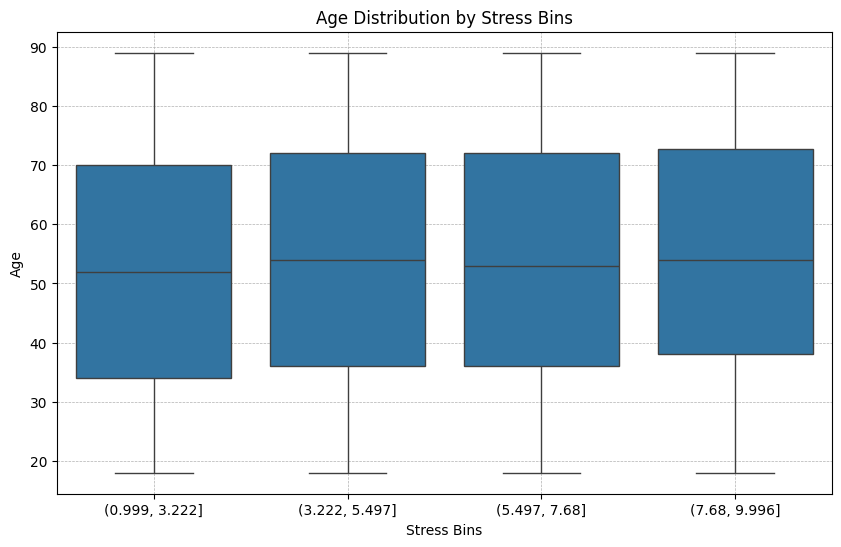


Age Distribution by Pollution:
                   count       mean        std   min   25%   50%   75%   max
Pollution_bin                                                              
(0.00539, 2.607]  750.0  53.862667  20.528103  18.0  36.0  54.0  71.0  89.0
(2.607, 5.096]    750.0  53.180000  21.294637  18.0  34.0  53.0  73.0  89.0
(5.096, 7.476]    750.0  53.468000  19.795575  18.0  37.0  53.0  71.0  89.0
(7.476, 9.998]    750.0  53.432000  20.668211  18.0  37.0  53.0  72.0  89.0


/tmp/ipykernel_32555/4134245270.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = capped_data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Pollution_bin,,,,,,,,
"(0.00539, 2.607]",750.0,53.862667,20.528103,18.0,36.0,54.0,71.0,89.0
"(2.607, 5.096]",750.0,53.180000,21.294637,18.0,34.0,53.0,73.0,89.0
"(5.096, 7.476]",750.0,53.468000,19.795575,18.0,37.0,53.0,71.0,89.0
"(7.476, 9.998]",750.0,53.432000,20.668211,18.0,37.0,53.0,72.0,89.0


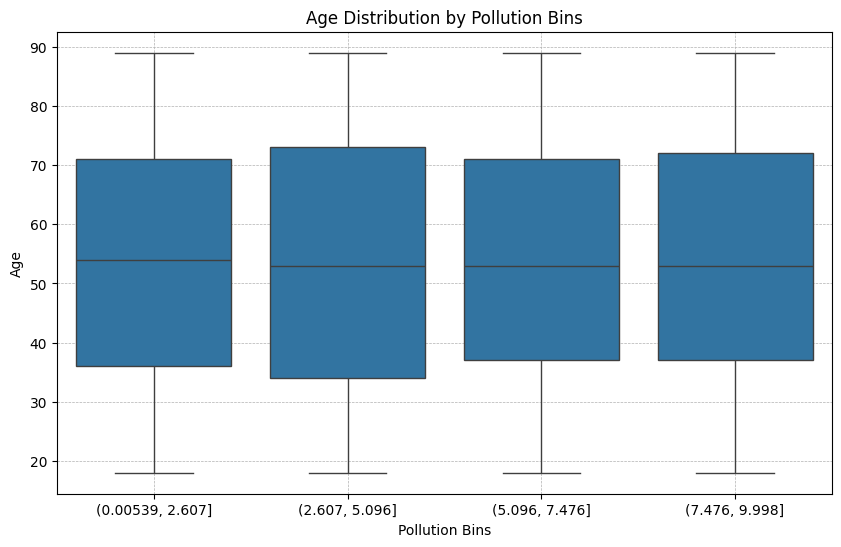


Age Distribution by Sun_Exposure:
                                 count       mean        std   min   25%   50%  \
Sun_Exposure_bin                                                                
(0.0010600000000000002, 2.873]  750.0  52.442667  20.049906  18.0  35.0  53.0   
(2.873, 5.957]                  750.0  54.157333  20.730692  18.0  37.0  54.0   
(5.957, 8.991]                  750.0  54.165333  20.627133  18.0  37.0  54.0   
(8.991, 11.993]                 750.0  53.177333  20.851993  18.0  35.0  53.0   

                                 75%   max  
Sun_Exposure_bin                            
(0.0010600000000000002, 2.873]  69.0  89.0  
(2.873, 5.957]                  73.0  89.0  
(5.957, 8.991]                  73.0  89.0  
(8.991, 11.993]                 71.0  89.0  


/tmp/ipykernel_32555/4134245270.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = capped_data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Sun_Exposure_bin,,,,,,,,
"(0.0010600000000000002, 2.873]",750.0,52.442667,20.049906,18.0,35.0,53.0,69.0,89.0
"(2.873, 5.957]",750.0,54.157333,20.730692,18.0,37.0,54.0,73.0,89.0
"(5.957, 8.991]",750.0,54.165333,20.627133,18.0,37.0,54.0,73.0,89.0
"(8.991, 11.993]",750.0,53.177333,20.851993,18.0,35.0,53.0,71.0,89.0


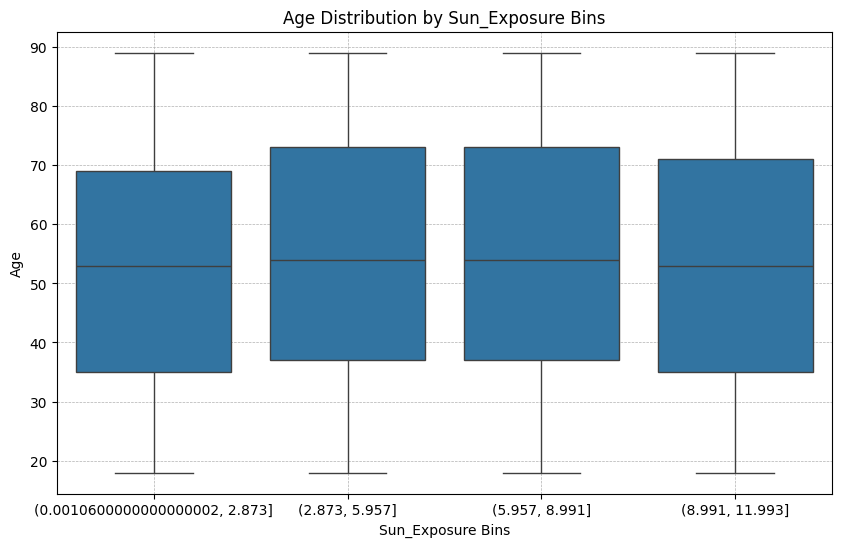


Age Distribution by Systolic_BP:
                   count       mean        std   min   25%   50%   75%   max
Systolic_BP_bin                                                            
(101.999, 135.0]  790.0  36.981013  14.836187  18.0  26.0  34.0  45.0  89.0
(135.0, 146.0]    754.0  48.014589  16.831200  18.0  35.0  47.0  60.0  89.0
(146.0, 157.0]    707.0  58.643564  18.187884  18.0  45.0  60.0  74.0  89.0
(157.0, 190.0]    749.0  71.532710  14.059673  21.0  64.0  75.0  82.0  89.0


/tmp/ipykernel_32555/4134245270.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = capped_data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Systolic_BP_bin,,,,,,,,
"(101.999, 135.0]",790.0,36.981013,14.836187,18.0,26.0,34.0,45.0,89.0
"(135.0, 146.0]",754.0,48.014589,16.831200,18.0,35.0,47.0,60.0,89.0
"(146.0, 157.0]",707.0,58.643564,18.187884,18.0,45.0,60.0,74.0,89.0
"(157.0, 190.0]",749.0,71.532710,14.059673,21.0,64.0,75.0,82.0,89.0


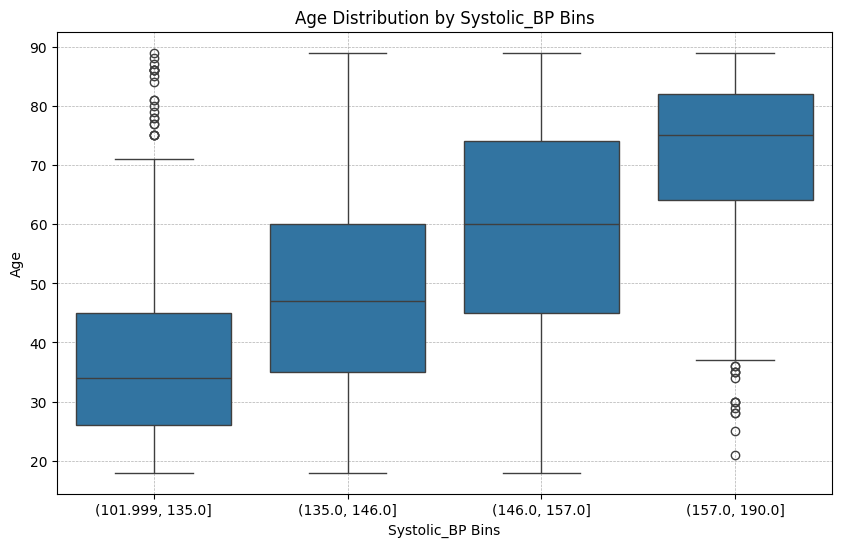


Age Distribution by Diastolic_BP:
                   count       mean        std   min   25%   50%   75%   max
Diastolic_BP_bin                                                           
(67.999, 89.0]    825.0  37.881212  15.445659  18.0  26.0  35.0  46.0  89.0
(89.0, 95.0]      694.0  48.778098  17.921177  18.0  34.0  47.0  61.0  89.0
(95.0, 103.0]     827.0  59.418380  18.340446  18.0  46.0  61.0  75.0  89.0
(103.0, 124.0]    654.0  70.663609  14.301608  22.0  62.0  74.0  82.0  89.0


/tmp/ipykernel_32555/4134245270.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = capped_data.groupby(f'{col}_bin')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Diastolic_BP_bin,,,,,,,,
"(67.999, 89.0]",825.0,37.881212,15.445659,18.0,26.0,35.0,46.0,89.0
"(89.0, 95.0]",694.0,48.778098,17.921177,18.0,34.0,47.0,61.0,89.0
"(95.0, 103.0]",827.0,59.418380,18.340446,18.0,46.0,61.0,75.0,89.0
"(103.0, 124.0]",654.0,70.663609,14.301608,22.0,62.0,74.0,82.0,89.0


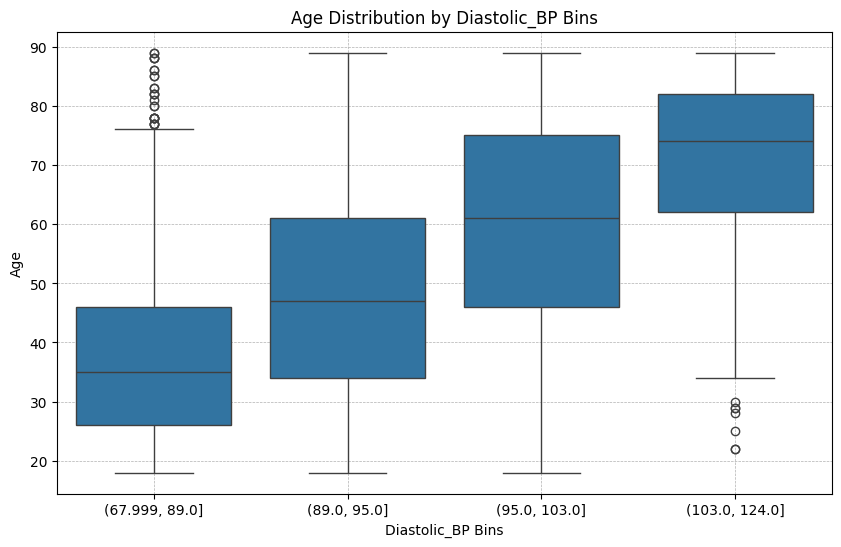

In [109]:
def cap_outliers(data, numeric_columns, factor=1.5):
    capped_data = data.copy()
    
    for col in numeric_columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        
        capped_data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
        
    return capped_data

capped_data = cap_outliers(data, numeric_columns)

num_bins = 4  
age_distribution_tables = {}

for col in numeric_columns:
    if col != 'Age': 
        capped_data[f'{col}_bin'] = pd.qcut(capped_data[col], q=num_bins, duplicates='drop')

        summary_stats = capped_data.groupby(f'{col}_bin')['Age'].describe()

        age_distribution_tables[col] = summary_stats
        print(f"\nAge Distribution by {col}:\n", summary_stats)
        display(summary_stats)

        plt.figure(figsize=(10, 6))
        sns.boxplot(data=capped_data, x=f'{col}_bin', y='Age')
        plt.title(f'Age Distribution by {col} Bins')
        plt.xlabel(f'{col} Bins')
        plt.ylabel('Age')
        plt.xticks(rotation=0)
        plt.grid(linestyle="--", linewidth=0.5)
        plt.show()

### Nhận xét

Sau khi thay thế các giá trị dưới cận dưới bằng cận dưới và các giá trị trên cận trên bằng cận trên, dữ liệu đã có một số thay đổi đáng kể trong việc phân phối của các biến số:

- Thu hẹp khoảng giá trị: Do các giá trị đã bị thay thế tại hai đầu khoảng, các biến số hiện có khoảng giá trị nhỏ hơn. Điều này giúp phân phối dữ liệu tập trung hơn trong một phạm vi xác định, từ đó giảm thiểu giá trị mang tính bất ngờ không cần thiết trong dữ liệu.